<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">🚗 Car Ex-Showroom Price Prediction 🚗</p>

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">


<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

<b>Project Objective:-</b> 

1. The objective of this project is to <b>develop a Machine Learning model</b> that accurately predicts the ex-showroom price of a car based on various relevant features.<br>
    
    
2. By analyzing a <b>dataset of 140 car attributes</b>, we aim to identify the significant factors that contribute to the price variations and build a robust predictive model.<br>
    
    
3. The project will involve <b>Data cleanining, Exploratory Data Analysis, Data Preprocessing, Feature Selection, Model Training and Evaluation</b> to achieve accurate and reliable predictions of car prices. <br>
    
    
4. The <b>ultimate goal</b> is to provide valuable insights to car buyers and sellers, enabling informed decision-making in the automotive market.<br>
    
    
5. <b>Dataset Link:-</b> <a href="https://www.kaggle.com/datasets/harmeetsingh07/exshowroom-price">Click to get the Dataset</a><br>
 
<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:'#DEB887';"><b> Author:- </b> Kumod Sharma</h2>
</div> 

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">📚 Importing Libraries 📚</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.2)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from scipy import stats
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, learning_curve
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> 📥 Loading Dataset 📥</p>

In [2]:
df = pd.read_csv("C:\\Users\\kumod sharma\\Desktop\\cars_engage_2022.csv",index_col=[0])

In [3]:
df.head(3)

Make      Model  Variant Ex-Showroom_Price Displacement  Cylinders  \
0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc        2.0   
1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc        2.0   
2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RWD (Rear Wheel Drive)                In-line   
1                  2.0  RWD (Rear Wheel Drive)                In-line   
2                  2.0  RWD (Rear Wheel Drive)                In-line   

  Emission_Norm   Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type  \
0         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
1         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
2         BS IV  Rear, Transverse   Injection          15 litres       CNG   

    Height   Length    Width  Body_Type  Doors    City_Mileage  \
0  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre   
1  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre   
2  1652 mm  3164 mm  1750 mm  Hatchback    4.0             NaN   

  Highway_Mileage ARAI_Certified_Mileage ARAI_Certified_Mileage_for_CNG  \
0             NaN          23.6 km/litre                            NaN   
1             NaN          23.6 km/litre                            NaN   
2             NaN                    NaN                       36 km/kg   

  Kerb_Weight Gears Ground_Clearance Front_Brakes Rear_Brakes  \
0      660 kg     4           180 mm         Drum        Drum   
1      725 kg     4           180 mm         Drum        Drum   
2      710 kg     4           180 mm         Drum        Drum   

                                    Front_Suspension  \
0  Independent, Lower Wishbone, McPherson Strut w...   
1  Independent, Lower Wishbone, McPherson Strut w...   
2  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension Front_Track Rear_Track  \
0  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
1  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
2  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   

  Front_Tyre_&_Rim Rear_Tyre_&_Rim  Power_Steering       Power_Windows  \
0        135/70R12       155/65R12  Electric Power  Only Front Windows   
1        135/70R12       155/65R12             NaN                 NaN   
2        135/70R12       155/65R12  Electric Power                 NaN   

  Power_Seats Keyless_Entry         Power        Torque Odometer Speedometer  \
0         NaN        Remote  38PS@5500rpm  51Nm@4000rpm  Digital      Analog   
1         NaN           NaN  38PS@5500rpm  51Nm@4000rpm  Digital      Analog   
2         NaN           NaN  38PS@5500rpm  51Nm@4000rpm  Digital      Analog   

     Tachometer Tripmeter  Seating_Capacity Seats_Material    Type Wheelbase  \
0  Not on offer       Yes               4.0         Fabric  Manual   2230 mm   
1  Not on offer       Yes               4.0         Fabric  Manual   2230 mm   
2  Not on offer       Yes               4.0         Fabric  Manual   2230 mm   

  Wheels_Size Start_/_Stop_Button 12v_Power_Outlet  \
0    4 B X 12                 Yes              Yes   
1    4 B X 12                 NaN              Yes   
2    4 B X 12                 NaN              Yes   

                   Audiosystem Aux-in_Compatibility Average_Fuel_Consumption  \
0  CD Player with USB & Aux-in                  Yes                      Yes   
1                 Not on offer                  NaN                      Yes   
2                 Not on offer                  NaN                      Yes   

                                      Basic_Warranty Bluetooth  \
0  2 years /75000 Kms (years/distance whichever c...       Yes   
1  2 years /75000 Kms (years/distance whichever c...       NaN   
2  2 years /75000 Kms (years/distance whichever c...       N

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> 🧠 Basic Understanding of Data 🧠

### 1. Cheking Dimension of Dataset.

In [4]:
df.shape

(1276, 140)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are total **1276 Records/Rows** in the dataset. 
* There are total **140 Features/columns** in the dataset.

### 2. Generating Basic Information about Data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are only **6 Numerical Features** in the dataset.
* On the other hand we have **134 Categorical features.**

### 3. Showing Random Sample of Only Numerical Features.

In [6]:
df.select_dtypes(include="float").sample(5)

Cylinders  Valves_Per_Cylinder  Doors  Seating_Capacity  \
607         4.0                  2.0    4.0               5.0   
523         4.0                  4.0    5.0               5.0   
1076        4.0                  4.0    4.0               5.0   
591         NaN                  NaN    5.0               5.0   
867        10.0                  4.0    2.0               2.0   

      Number_of_Airbags  USB_Ports  
607                 2.0        NaN  
523                 2.0        NaN  
1076                2.0        NaN  
591                 2.0        NaN  
867                 4.0        NaN

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>
   
* We can clearly oberve that the **USB_Ports** is having only **NaN values** in radom 5 sample. 
* We will **check the missing values** in detail for the other **numerical features.**

### 4. Showing Radom Sample of Only Categorical Features.

In [7]:
df.select_dtypes(include="object").sample(5)

Make           Model            Variant Ex-Showroom_Price  \
296       Bmw              X5    Xdrive30D Xline     Rs. 82,90,000   
693      Tata            Hexa             Xt 4X2     Rs. 17,96,458   
1018  Hyundai          Tucson  2Wd At Gls Petrol     Rs. 23,73,522   
892      Fiat  Punto Evo Pure  1.2L Fire Dynamic      Rs. 4,82,330   
507      Tata           Nexon  Xz Plus Dual Tone      Rs. 9,70,000   

     Displacement               Drivetrain Cylinder_Configuration  \
296       2993 cc    AWD (All Wheel Drive)                In-line   
693       2179 cc   RWD (Rear Wheel Drive)                In-line   
1018      1999 cc  FWD (Front Wheel Drive)                In-line   
892       1172 cc  FWD (Front Wheel Drive)                In-line   
507       1198 cc  FWD (Front Wheel Drive)                In-line   

     Emission_Norm      Engine_Location Fuel_System Fuel_Tank_Capacity  \
296          BS IV  Front, Longitudinal   Injection                NaN   
693          BS IV    Front, Transverse   Injection                NaN   
1018         BS IV  Front, Longitudinal   Injection          62 litres   
892          BS IV  Front, Longitudinal   Injection          45 litres   
507           BS 6                  NaN   Injection          44 litres   

     Fuel_Type   Height   Length    Width  Body_Type   City_Mileage  \
296     Diesel  1745 mm  4922 mm  2218 mm        SUV            NaN   
693     Diesel  1791 mm  4788 mm  1903 mm        SUV    14 km/litre   
1018    Petrol  1660 mm  4475 mm  1850 mm        SUV  13.3 km/litre   
892     Petrol  1525 mm  3987 mm  1687 mm  Hatchback    12 km/litre   
507     Petrol  1607 mm  3994 mm  1811 mm        SUV            NaN   

     Highway_Mileage ARAI_Certified_Mileage ARAI_Certified_Mileage_for_CNG  \
296              NaN         13.38 km/litre                            NaN   
693    17.6 km/litre          17.6 km/litre                            NaN   
1018  12.95 km/litre         12.95 km/litre                            NaN   
892      15 km/litre            15 km/litre                            NaN   
507              NaN          17.6 km/litre                            NaN   

     Kerb_Weight Gears Ground_Clearance     Front_Brakes      Rear_Brakes  \
296          NaN     8              NaN  Ventilated Disc  Ventilated Disc   
693      2280 kg     6           200 mm  Ventilated Disc  Ventilated Disc   
1018         NaN     5              NaN  Ventilated Disc       Solid Disc   
892      1165 kg     5           195 mm  Ventilated Disc             Drum   
507          NaN   NaN           209 mm  Ventilated Disc             Drum   

                                       Front_Suspension  \
296                          Sports suspension settings   
693              Double Wishbone type with Coil Springs   
1018                   McPherson strut with coil spring   
892   Mac Pherson strut with Lower Transverse link, ...   
507                               Independent McPherson   

                                     Rear_Suspension Front_Track Rear_Track  \
296    Self-levelling with pneumatic rear suspension     1600 mm    1659 mm   
693    Coil Spring type 5 link rigid axle suspension         NaN        NaN   
1018                 Multilink Type with Coil Spring     1540 mm    1540 mm   
892                       Torsion beam & coil spring         NaN        NaN   
507   Twist Beam with Coil spring and Shock Absorber         NaN        NaN   

     Front_Tyre_&_Rim Rear_Tyre_&_Rim   Power_Steering Power_Windows  \
296         255/50R19       255/50R19   Electric Power   All Windows   
693        235/55 R19      235/55 R19   Electric Power   All Windows   
1018       225/55 R18      225/55 R18   Electric Power   All Windows   
892         165/80R14       165/80R14  Hydraulic Power   All Windows   
507      215 / 60 R16    215 / 60 R16   Electric Power   All Windows   

           Power_Seats Keyless_Entry          Power              Torque  \
296                Yes     Smar

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **In the end many attributes** contanins **only missing values.** We will deal with those features while performing **Data Cleaning**.
* There are many **numerical features** which are having **categorical data-type**. So we have to change their data-types.

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">🧹 Data Cleaning 🧹

### 1. Computing Total No. Missing values and % of Missing values.

In [8]:
null_df = df.isnull().sum()[df.isnull().sum()>0].to_frame().rename(columns={0:"Total No. of Missing Values"})
null_df["% of Missing values"] = round(100*null_df["Total No. of Missing Values"]/len(df),2)
null_df.sort_values(by="% of Missing values",ascending=False)

Total No. of Missing Values  \
Other_Specs                                                       1266   
Recommended_Tyre_Pressure                                         1266   
Battery                                                           1263   
Electric_Range                                                    1259   
ARAI_Certified_Mileage_for_CNG                                    1249   
USB_Ports                                                         1247   
Engine_Type                                                       1242   
3_Point_Seat-Belt_in_Middle_Rear_Seat                             1225   
Heads-Up_Display                                                  1225   
Ambient_Lightning                                                 1220   
Other_specs                                                       1213   
Lane_Watch_Camera/_Side_Mirror_Camera                             1210   
Welcome_Lights                                                    1207   
Walk_Away_Auto_Car_Lock                                           1173   
Cargo/Boot_Lights                                                 1155   
Voice_Recognition                                                 1144   
Passenger_Side_Seat-Belt_Reminder                                 1105   
Android_Auto                                                      1103   
Apple_CarPlay                                                     1103   
Drive_Modes                                                       1081   
High_Speed_Alert_System                                           1068   
Heated_Seats                                                      1010   
Paddle_Shifters                                                    972   
Tyre_Pressure_Monitoring_System                                    936   
Compression_Ratio                                                  917   
Power_Seats                                                        893   
ASR_/_Traction_Control                                             834   
Highway_Mileage                                                    800   
Rain_Sensing_Wipers                                                798   
Hill_Assist                                                        796   
ESP_(Electronic_Stability_Program)                                 779   
Automatic_Headlamps                                                774   
Cruise_Control                                                     727   
EBA_(Electronic_Brake_Assist)                                      690   
Leather_Wrapped_Steering                                           689   
Cigarette_Lighter                                                  682   
Start_/_Stop_Button                                                678   
Rear_Track                                                         676   
Front_Track                                                        667   
ISOFIX_(Child-Seat_Mount)                                          666   
iPod_Compatibility                                                 663   
Extended_Warranty                                                  661   
Cooled_Glove_Box                                                   645   
Auto-Dimming_Rear-View_Mirror                                      620   
Turbocharger                                                       618   
Second_Row_AC_Vents                                                602   
Gross_Vehicle_Weight                                               595   
Navigation_System                                                  593   
Rear_Center_Armrest                                                559   
City_Mileage                                                       555   
Gear_Shift_Reminder                                                543   
Average_Speed                                                      512   
Gear_Indicator                                                     499   
Infotainment_Screen                            

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Almost 25 features** are having missing values **more than 70%**. So we can **simply drop these features.**
* Because if we fill missing values in those attributes our **original data/raw data** will be **totally changed.**

### 2. Dropping Features having Missing values more than 70%.

In [9]:
high_null_df = null_df[null_df["% of Missing values"]>70].index.tolist()

df.drop(columns=high_null_df,inplace=True)
df.shape

(1276, 115)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Earlier we were having total **140 features** and we dropped **25 features**.
* So we are left with only **115 features**.

### 3. Checking Data-Types of Features.

In [10]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

Data-Types
Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     object
Doors                                        float64
City_Mileage                                  object
Highway_Mileage                               object
ARAI_Certified_Mileage                        object
Kerb_Weight                                   object
Gears                                         object
Ground_Clearance                              object
Front_Brakes                                  object
Rear_Brakes                                   object
Front_Suspension                              object
Rear_Suspension                               object
Front_Track                                   object
Rear_Track                                    object
Front_Tyre_&_Rim                              object
Rear_Tyre_&_Rim                               object
Power_Steering                                object
Power_Windows                                 object
Power_Seats                                   object
Keyless_Entry                                 object
Power                                         object
Torque                                        object
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Seating_Capacity                             float64
Seats_Material                                object
Type                                          object
Wheelbase                                     object
Wheels_Size                                   object
Start_/_Stop_Button                           object
12v_Power_Outlet                              object
Audiosystem                                   object
Aux-in_Compatibility                          object
Average_Fuel_Consumption                      object
Basic_Warranty                                object
Bluetooth                                     object
Boot-lid_Opener                               object
Boot_Space                                    object
CD_/_MP3_/_DVD_Player                         object
Central_Locking                               object
Child_Safety_Locks                            object
Clock                                         object
Cup_Holders                                   object
Distance_to_Empty                             object
Door_Pockets                                  object
Engine_Malfunction_Light                      object
Extended_Warranty                             object
FM_Radio                                      object
Fuel-lid_Opener                               object
Fuel_Gauge                                    object
Handbrake                                     object
Instrument_Console                            object
Low_Fuel_Warning                              object
Minimum_Turning_Radius                        object
Multifunction_Display                         object
Sun_Visor                                     object
Third_Row_AC_V

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We are having both **numeircal & categorical Features.** But **mostly categorical Features.**
* For better and easy cleaning it's better to split the dataframe into **two new data-frames**.
    1. **`Dataframe having only Categroical Variables.`**
    
    2. **`Dataframe having only Numerical Variables.`**

### 4. Splitting Data-Frame into 2 new Data-Frames.

In [11]:
df_numeric = df.select_dtypes(include="float")    ##Containing only Numerical Attributes.
df_object  = df.select_dtypes(include="object")   ##Containing only Categorical Attributes.

In [12]:
print("Shape of numerical dataframe is:",df_numeric.shape)
print("Shape of categorical dataframe is:", df_object.shape)

Shape of numerical dataframe is: (1276, 5)
Shape of categorical dataframe is: (1276, 110)


---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">🧼 Cleaning Numerical Data-Frame 🧼

### 1. Displaying Random Sample of Numerical Data-Frame.

In [13]:
df_numeric.sample(5)

Cylinders  Valves_Per_Cylinder  Doors  Seating_Capacity  \
940        NaN                  4.0    5.0               5.0   
485        4.0                  4.0    4.0               5.0   
496        4.0                  4.0    5.0               5.0   
210        4.0                  4.0    5.0               5.0   
877       12.0                  4.0    2.0               2.0   

     Number_of_Airbags  
940                2.0  
485                2.0  
496                2.0  
210                2.0  
877                6.0

### 2. Computing Total No. of Missing Values and  their % .

In [14]:
null_df = df_numeric.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
null_df["% of Missing Values"] = round((100*null_df["Total No. of Missing Values"])/len(df_numeric),2)
null_df

Total No. of Missing Values  % of Missing Values
Cylinders                                     66                 5.17
Valves_Per_Cylinder                          102                 7.99
Doors                                          4                 0.31
Seating_Capacity                               6                 0.47
Number_of_Airbags                            135                10.58

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **5 out of 5 Features are having Missing values.** But the **% of Missing values is very low.**
* So **instead of dropping** these records we can **fill them with suitable values.**

### 3. Filling Missing Values in Numerical Data-Frame.

In [15]:
imputer = SimpleImputer(strategy="median")

In [16]:
cols = df_numeric.columns.to_list()      ##List of all numerical columns.

df_numeric[cols] = imputer.fit_transform(df[cols])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Note:</font></h3>

* The easiest way to **fill numerical missing values** is to replace them with either the **mean or median value of the feature.** 
* But the **mean values** are **robust to outliers** where as **median values** are **not robust to outliers.**
* So that's why I have **filled missing values** with the **median values**.

### 4. Confirming the filling of missing values.

In [17]:
df_numeric.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values Left"})

Total No. of Missing Values Left
Cylinders                                           0
Valves_Per_Cylinder                                 0
Doors                                               0
Seating_Capacity                                    0
Number_of_Airbags                                   0

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **All the missing values** have been filled with their respective median values.
* So we are **done with cleaning our Numerical Data-Frame.** 
* **Next** we we can clean the **Categorical Data-Frame.**

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">🧼 Cleaning Categorical Data-Frame 🧼

### 1. Displaying Random Sample of Categorical Data-Frame.

In [18]:
df_object.sample(3)

Make    Model     Variant Ex-Showroom_Price Displacement  \
1012      Hyundai  Elantra    Sx(O) At     Rs. 20,39,000      1999 cc   
327      Maserati  Levante  Granlusson   Rs. 1,53,83,399      2979 cc   
864   Lamborghini  Huracan    Lp 580-2   Rs. 3,24,52,486      5204 cc   

                   Drivetrain Cylinder_Configuration Emission_Norm  \
1012  FWD (Front Wheel Drive)                In-line          BS 6   
327     AWD (All Wheel Drive)                      V         BS IV   
864    RWD (Rear Wheel Drive)                      V         BS IV   

          Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type   Height  \
1012    Front, Transverse   Injection          50 litres    Petrol  1465 mm   
327   Front, Longitudinal   Injection          80 litres    Diesel  1679 mm   
864      Rear, Transverse   Injection          90 litres    Petrol  1165 mm   

       Length    Width Body_Type   City_Mileage Highway_Mileage  \
1012  4620 mm  1800 mm     Sedan  13.1 km/litre   14.6 km/litre   
327   5003 mm  2158 mm       SUV   5.2 km/litre    6.2 km/litre   
864   4459 mm  1924 mm     Coupe   5.8 km/litre             NaN   

     ARAI_Certified_Mileage Kerb_Weight Gears Ground_Clearance  \
1012          14.6 km/litre         NaN     6              NaN   
327            7.9 km/litre         NaN     6              NaN   
864          11.24 km/litre     1389 kg     7           135 mm   

         Front_Brakes      Rear_Brakes  \
1012  Ventilated Disc  Ventilated Disc   
327   Ventilated Disc  Ventilated Disc   
864   Ventilated Disc  Ventilated Disc   

                                      Front_Suspension  \
1012             Mcpherson strut Type with coil spring   
327   Double wishbone coil springs with stabilizer bar   
864                Aluminum double-wishbone suspension   

                                        Rear_Suspension Front_Track  \
1012                          Coupled Torsion Beam Axle         NaN   
327   Double Wishbone Type With Coil Springs & Anti-...     1624 mm   
864                 Aluminum double-wishbone suspension     1668 mm   

     Rear_Track Front_Tyre_&_Rim Rear_Tyre_&_Rim     Power_Steering  \
1012        NaN        205/60R16       205/60R16     Electric Power   
327     1676 mm      255/60 ZR18     255/60 ZR18  Electro-Hydraulic   
864     1620 mm        245/35R19       305/35R19     Electric Power   

           Power_Windows  Power_Seats Keyless_Entry          Power  \
1012         All Windows          NaN     Smart Key  152PS@6200rpm   
327          All Windows          Yes     Smart Key  430PS@5750rpm   
864   Only Front Windows  Power seats     Smart Key  580PS@8000rpm   

                  Torque Odometer      Speedometer Tachometer Tripmeter  \
1012       196Nm@4000rpm  Digital  Analog, Digital     Analog       Yes   
327   580Nm@4500-5000rpm  Digital           Analog     Analog       Yes   
864        540Nm@6500rpm  Digital          Digital     Analog       Yes   

     Seats_Material       Type Wheelbase  Wheels_Size Start_/_Stop_Button  \
1012        Leather        AMT   2700 mm    205/60R16                 Yes   
327         Leather  Automatic   3004 mm  255/60 ZR18                 Yes   
864         Leather  Automatic   2620 mm          R19                 Yes   

     12v_Power_Outlet                   Audiosystem Aux-in_Compatibility  \
1012              Yes   CD Player with USB & Aux-in                  Yes   
327               Yes  DVD Player with USB & Aux-in                  Yes   
864               Yes  DVD Player with USB & Aux-in                  Yes   

     Average_Fuel_Consumption           Basic_Warranty Bluetooth  \
1012                      Yes                      NaN       Yes   
327                       Yes                      NaN       Yes   
864                       Yes  3 years / Unlimited Kms       Yes   

            Boot-lid_Opener  Boot_Space CD_/_MP3_/_DVD_Player Central_Locking  \
1012               Internal         NaN                   Yes     

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* In the end **most of the features are having only missing values.**
* There are many **numerical features** which are having **object** data-type but it should be having **numerical data-type.**

<h3 align="left"><font color=brown>📊 Note:</font></h3>
 
* There are **total 110 categorical features** but all them are **not relevant for predicting price of car.**
* So we will **extract** the features which are **relevant to our target feature.**

### 2. Extracting the Relevant Attributes from the Categorical Data-Frame.

In [19]:
relevant_cols = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain',"Cylinder_Configuration",
                 'Emission_Norm', "Engine_Location", "Fuel_Tank_Capacity","Height", "Length", "Width",
                 "Body_Type", "ARAI_Certified_Mileage", "Kerb_Weight", "Ground_Clearance", "Boot_Space", "Power_Steering",
                 "Keyless_Entry", "Power", "Torque", "Odometer", "Speedometer", "Tachometer", "Tripmeter", "Seats_Material"
                 ,"Fuel_Type", "Wheelbase", "Central_Locking", "Child_Safety_Locks", "Low_Fuel_Warning",
                 "Third_Row_AC_Vents", "Second_Row_AC_Vents", "Auto-Dimming_Rear-View_Mirror", "Engine_Immobilizer",
                 "ABS_(Anti-lock_Braking_System)", "EBD_(Electronic_Brake-force_Distribution)", "Cooled_Glove_Box",
                 "EBA_(Electronic_Brake_Assist)", "ESP_(Electronic_Stability_Program)",
                 "Gear_Shift_Reminder", "Adjustable_Steering_Column", "Parking_Assistance","Key_Off_Reminder",
                 "USB_Compatibility", "Bluetooth", "Seat_Height_Adjustment", "Navigation_System", "Turbocharger",
                 "Automatic_Headlamps","Cruise_Control"]

In [20]:
df_object_2 = df_object[relevant_cols]

df_object_2.shape

(1276, 52)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All the **Features selected** above are all relevant for **car price prediction.** 
* **Note:** 
    1. **The features selected** are based on the **domain knowledge and expertise of cars.**
    2. I have selected **only 52 features out of 110 features.**

### 3. Display Random Sample from new Categorical Data-Frame.

In [21]:
df_object_2.sample(2)

Make    Model              Variant Ex-Showroom_Price Displacement  \
525    Tata    Nexon  Xza Plus (O) Diesel     Rs. 12,50,000      1497 cc   
1250  Skoda  Octavia     Onyx 2.0 Tdi Dsg     Rs. 21,99,599      1968 cc   

                   Drivetrain Cylinder_Configuration Emission_Norm  \
525   FWD (Front Wheel Drive)                In-line          BS 6   
1250  FWD (Front Wheel Drive)                In-line         BS IV   

        Engine_Location Fuel_Tank_Capacity   Height   Length    Width  \
525                 NaN          44 litres  1607 mm  3994 mm  1811 mm   
1250  Front, Transverse          50 litres  1476 mm  4670 mm  1814 mm   

     Body_Type ARAI_Certified_Mileage Kerb_Weight Ground_Clearance  \
525        SUV         23.97 km/litre         NaN           209 mm   
1250     Sedan          19.5 km/litre     1395 kg           155 mm   

      Boot_Space     Power_Steering Keyless_Entry          Power  \
525   350 litres     Electric Power     Smart Key  110PS@3750RPM   
1250  590 litres  Electro-Hydraulic     Smart Key  143PS@4000rpm   

                  Torque Odometer Speedometer Tachometer Tripmeter  \
525   260Nm@1500-2750rpm   Analog      Analog    Digital       Yes   
1250  320Nm@1750-3000rpm  Digital      Analog     Analog       Yes   

     Seats_Material Fuel_Type Wheelbase Central_Locking Child_Safety_Locks  \
525          Fabric    Diesel   2498 mm             Yes                Yes   
1250        Leather    Diesel   2688 mm             Yes                Yes   

     Low_Fuel_Warning Third_Row_AC_Vents Second_Row_AC_Vents  \
525               Yes     Not Applicable                 Yes   
1250              Yes     Not Applicable                 Yes   

     Auto-Dimming_Rear-View_Mirror Engine_Immobilizer  \
525                            Yes                Yes   
1250                           Yes                Yes   

     ABS_(Anti-lock_Braking_System) EBD_(Electronic_Brake-force_Distribution)  \
525                             Yes                                       Yes   
1250                            Yes                                       Yes   

     Cooled_Glove_Box EBA_(Electronic_Brake_Assist)  \
525               Yes                           NaN   
1250              Yes                           Yes   

     ESP_(Electronic_Stability_Program) Gear_Shift_Reminder  \
525                                 NaN                 Yes   
1250                                Yes                 NaN   

     Adjustable_Steering_Column                  Parking_Assistance  \
525                 Reach, Rake            Rear sensors with camera   
1250                Rake, Reach  Front and rear sensors with camera   

     Key_Off_Reminder USB_Compatibility Bluetooth  \
525               NaN               Yes       Yes   
1250              Yes               Yes       Yes   

               Seat_Height_Adjustment Navigation_System Turbocharger  \
525                 Manual Adjustment               Yes          Yes   
1250  Electric Adjustment with Memory               Yes          Yes   

     Automatic_Headlamps Cruise_Control  
525                  Yes            NaN  
1250                 Yes            Yes

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can observe that **most of attributes** are having **missing values.**
* There are many **many attributes which are storing numerical values** but they are having **categorical data-type.**So we have to clean those attributes

### 4. Computing Total No. of Missing Values and % of Missing values.

In [22]:
null_df = df_object_2.isnull().sum()[df_object_2.isnull().sum()>0].to_frame().rename(columns={0:"Total No. of Missing Values"})
null_df["% of Missing Values"] = round((100*null_df["Total No. of Missing Values"])/len(df_object_2),2)
null_df.sort_values(by="% of Missing Values",ascending=False)

Total No. of Missing Values  \
ESP_(Electronic_Stability_Program)                                 779   
Automatic_Headlamps                                                774   
Cruise_Control                                                     727   
EBA_(Electronic_Brake_Assist)                                      690   
Cooled_Glove_Box                                                   645   
Auto-Dimming_Rear-View_Mirror                                      620   
Turbocharger                                                       618   
Second_Row_AC_Vents                                                602   
Navigation_System                                                  593   
Gear_Shift_Reminder                                                543   
Third_Row_AC_Vents                                                 366   
Kerb_Weight                                                        365   
Key_Off_Reminder                                                   340   
Seat_Height_Adjustment                                             326   
Bluetooth                                                          292   
Parking_Assistance                                                 290   
Ground_Clearance                                                   289   
Keyless_Entry                                                      274   
USB_Compatibility                                                  267   
Boot_Space                                                         238   
EBD_(Electronic_Brake-force_Distribution)                          201   
Adjustable_Steering_Column                                         191   
Central_Locking                                                    149   
ABS_(Anti-lock_Braking_System)                                     132   
ARAI_Certified_Mileage                                             114   
Make                                                                75   
Child_Safety_Locks                                                  75   
Fuel_Tank_Capacity                                                  69   
Tripmeter                                                           60   
Engine_Immobilizer                                                  60   
Power_Steering                                                      57   
Speedometer                                                         45   
Odometer                                                            43   
Engine_Location                                                     43   
Low_Fuel_Warning                                                    36   
Wheelbase                                                           20   
Cylinder_Configuration                                              13   
Tachometer                                                          13   
Displacement                                                        12   
Width                                                               12   
Seats_Material                                                      12   
Emission_Norm                                                       11   
Drivetrain                                                           7   
Body_Type                                                            6   
Torque                                                               2   
Height                                                               1   

                                           % of Missing Values  
ESP_(Electronic_Stability_Program)                       61.05  
Automatic_Headlamps                                      60.66  
Cruise_Control                                           56.97  
EBA_(Electronic_Brake_Assist)                            54.08  
Cooled_Glove_Box                                         50.55  
Auto-Dimming_Rear-View_Mirror                            48.59  
Turbocharger                                             48.43  
Second_Row_AC_Vents                         

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Almost **every feature** is **having missing values.**
* So we have to fill these **features missing values** with **suitable values.**
* Since There are **too many attributes** its better to **clean attributes step by step.**

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 1. Cleaning "Make" and "Model" Columns.</div> 

### 1 Checking Unique Values in "Make" Column.

In [23]:
print("Unique Values in Make column are:\n")
print(df_object_2["Make"].unique())

Unique Values in Make column are:

['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R']


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are some **typographical error / duplicate values** in list of **Make Feature.**
    1. **`Land Rover Rover`** should be **`Land Rover`.**
 
    2. **`Maruti Suzuki R`** should be **`Maruti Suzuki`.**

### 2. Checking the Discrepency of Land Rover Rover in "Make" & "Model" Columns.

In [24]:
df_object_2[df_object_2["Make"]=="Land Rover Rover"][["Make","Model"]]

Make                     Model
789  Land Rover Rover              Range Evoque
790  Land Rover Rover              Range Evoque
791  Land Rover Rover              Range Evoque
792  Land Rover Rover              Range Evoque
818  Land Rover Rover  Range Evoque Convertible
819  Land Rover Rover               Range Velar
820  Land Rover Rover               Range Velar
827  Land Rover Rover               Range Sport
828  Land Rover Rover               Range Sport
829  Land Rover Rover               Range Sport
830  Land Rover Rover               Range Sport
831  Land Rover Rover               Range Sport
832  Land Rover Rover               Range Sport
833  Land Rover Rover               Range Sport
834  Land Rover Rover               Range Sport
835  Land Rover Rover               Range Sport
836  Land Rover Rover               Range Sport
848  Land Rover Rover                     Range
849  Land Rover Rover                     Range
850  Land Rover Rover                     Range
851  Land Rover Rover                     Range
852  Land Rover Rover                     Range
853  Land Rover Rover                     Range
854  Land Rover Rover                     Range
855  Land Rover Rover                     Range
856  Land Rover Rover                     Range
857  Land Rover Rover                     Range

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is **some ambiguity** between **Make** & **Model** Columns.
    1. In **Make** Column it should be **Land Rover** not **Land Rover Rover**.
    2. In **Model** Column there should be **Rover** after **Range** in each **model names.**

### 3. Replacing Typographical Error with Suitable Values in "Land Rover".

In [25]:
df_object_2["Make"] = df_object_2["Make"].replace({"Land Rover Rover":"Land Rover"})

In [26]:
df_object_2["Model"] = df_object_2["Model"].str.replace("Range","Range Rover")

### 4. Checking the Discrepency of Maruti Suzuki R in Make and Model Attribute.

In [27]:
df_object_2[df_object_2["Make"]=="Maruti Suzuki R"][["Make","Model"]]

Make  Model
1173  Maruti Suzuki R  Wagon
1174  Maruti Suzuki R  Wagon
1175  Maruti Suzuki R  Wagon
1176  Maruti Suzuki R  Wagon
1177  Maruti Suzuki R  Wagon
1178  Maruti Suzuki R  Wagon
1179  Maruti Suzuki R  Wagon
1180  Maruti Suzuki R  Wagon
1181  Maruti Suzuki R  Wagon
1182  Maruti Suzuki R  Wagon
1183  Maruti Suzuki R  Wagon
1184  Maruti Suzuki R  Wagon
1185  Maruti Suzuki R  Wagon
1186  Maruti Suzuki R  Wagon

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is some ambiguity between **Make** and **Model** Columns.
    1. In **Make** Column it should be **Maruti Suzuki** not **Maruti Suzuki R.**
    2. In **Model** Column it should be **Wagon R** not only **Wagon.**

### 5. Replacing Typographical Error with Suitable Values in "Maruti Suzuki".

In [28]:
df_object_2["Make"] = df_object_2["Make"].replace({"Maruti Suzuki R":"Maruti Suzuki"})
df_object_2["Model"] = df_object_2["Model"].replace({"Wagon":"Wagon R"})

### 6. Computing Missing Value in "Make" Attribute.

In [29]:
print("Total Missing values in Make Attribute is:",df_object_2["Make"].isnull().sum())

Total Missing values in Make Attribute is: 75


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* For **Filling missing values** we can cross-check the **Make** and **Model** Columns and identy the **car manufacturer** names.

### 7. Cross-checking Car "Model" whose car manufacture"Make" is missing.

In [30]:
df_object_2[df_object_2["Make"].isnull()][["Make","Model"]]

Make                              Model
252   NaN              Mercedes-Benz B-Class
253   NaN              Mercedes-Benz B-Class
254   NaN              Mercedes-Benz B-Class
255   NaN              Mercedes-Benz B-Class
256   NaN            Mercedes-Benz Cla-Class
257   NaN            Mercedes-Benz Cla-Class
258   NaN            Mercedes-Benz Cla-Class
303   NaN    Mercedes-Benz E-Class Cabriolet
307   NaN                  Mercedes-Benz Gls
308   NaN                  Mercedes-Benz Gls
309   NaN                  Mercedes-Benz Gls
310   NaN                  Mercedes-Benz Gls
311   NaN                  Mercedes-Benz Gls
322   NaN              Mercedes-Benz S-Class
323   NaN              Mercedes-Benz S-Class
324   NaN              Mercedes-Benz S-Class
328   NaN              Mercedes-Benz G-Class
329   NaN              Mercedes-Benz G-Class
334   NaN              Mercedes-Benz Maybach
335   NaN              Mercedes-Benz Maybach
340   NaN    Mercedes-Benz S-Class Cabriolet
349   NaN        Rolls-Royce Ghost Series Ii
350   NaN        Rolls-Royce Ghost Series Ii
351   NaN                 Rolls-Royce Wraith
353   NaN               Rolls-Royce Cullinan
354   NaN          Rolls-Royce Phantom Coupe
793   NaN              Mercedes-Benz E-Class
794   NaN              Mercedes-Benz E-Class
795   NaN              Mercedes-Benz E-Class
796   NaN              Mercedes-Benz E-Class
797   NaN              Mercedes-Benz E-Class
798   NaN              Mercedes-Benz E-Class
799   NaN              Mercedes-Benz E-Class
800   NaN              Mercedes-Benz E-Class
806   NaN    Mercedes-Benz C-Class Cabriolet
809   NaN              Mercedes-Benz V-Class
810   NaN              Mercedes-Benz V-Class
811   NaN              Mercedes-Benz V-Class
821   NaN  Mercedes-Benz E-Class All Terrain
859   NaN               Mercedes-Benz Amg-Gt
860   NaN               Mercedes-Benz Amg-Gt
861   NaN               Mercedes-Benz Amg-Gt
862   NaN  Mercedes-Benz Amg Gt 4-Door Coupe
879   NaN                   Rolls-Royce Dawn
880   NaN         Rolls-Royce Drophead Coupe
883   NaN                                Go+
884   NaN                                Go+
885   NaN                                Go+
886   NaN                                Go+
887   NaN                                Go+
888   NaN                                Go+
889   NaN                                Go+
890   NaN                                Go+
891   NaN                                Go+
1025  NaN              Mercedes-Benz A-Class
1026  NaN              Mercedes-Benz A-Class
1033  NaN              Mercedes-Benz C-Class
1034  NaN              Mercedes-Benz C-Class
1035  NaN              Mercedes-Benz C-Class
1036  NaN              Mercedes-Benz C-Class
1037  NaN              Mercedes-Benz C-Class
1038  NaN              Mercedes-Benz C-Class
1047  NaN                  Mercedes-Benz Gle
1048  NaN                  Mercedes-Benz Gle
1049  NaN                  Mercedes-Benz Cls
1146  NaN            Mercedes-Benz Gla-Class
1147  NaN            Mercedes-Benz Gla-Class
1148  NaN            Mercedes-Benz Gla-Class
1149  NaN            Mercedes-Benz Gla-Class
1150  NaN            Mercedes-Benz Gla-Class
1151  NaN            Mercedes-Benz Gla-Class
1219  NaN                Rolls-Royce Phantom
1220  NaN                Rolls-Royce Phantom
1251  NaN                  Mercedes-Benz Glc
1252  NaN                  Mercedes-Benz Glc

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can clearly observe from above output that the **car-manufacture and car model name are combined.**
* So we can **extract car-manufacture** from the **Model Column** and **fill the missing values in Make Column.**
* We can extract the following **car-manufactuers:**
    1. **`Mercedes-Benz`**
    2. **`Rolls-Royce`**
    3. **`Datsun`**

### 8. Filling Missing Values in "Make" with suitable Car-Manufactuers Names.

In [31]:
##This will return all the index wherever there us a missing value.

index_list = df_object_2[df_object_2["Make"].isnull()].index   

for index in index_list:
    if df_object_2["Model"][index]=="Go+":
        df_object_2.loc[index,"Model"] = "Datsun Go+"
        
    value1 = df_object_2["Model"][index]
    value2 = value1.split(" ")[0]
    value3 = value1.split(" ")[1]
    
    df_object_2.loc[index, "Make"] = value2
    df_object_2.loc[index, "Model"] = value3

### 9. Assigning Suitable Names for "Make" & "Model" Columns.

In [32]:
df_object_2.rename(columns={"Make":"Car Manufacturer", "Model":"Car Model"},inplace=True)

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">2.Cleaning "Ex-Showrom_Price Column</div> 

### 1. Displaying Random 5 Values.

In [33]:
df_object_2["Ex-Showroom_Price"].sample(5).to_frame()

Ex-Showroom_Price
213       Rs. 6,85,729
1043     Rs. 64,63,780
994      Rs. 16,43,829
1048   Rs. 1,25,00,000
1052   Rs. 1,35,90,000

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Ex-Showroom Price** is having the **Currency** value combined with the **price values**.
* Hence we have to **extract** only the **numerical values** and **change its data-type.**

### 2. Cleaning "Ex-Showroom Price" Column.

In [34]:
df_object_2["Ex-Showroom_Price"] = df_object_2["Ex-Showroom_Price"].str.replace("Rs. ","").str.replace(",","")

In [35]:
df_object_2["Ex-Showroom_Price"].sample(5).to_frame()

Ex-Showroom_Price
44              422444
1181            486001
1042           5990000
611            1336500
545             942243

### 3. Converting Data-Type of "Ex-Showroom Price" Attribute.

In [36]:
df_object_2["Ex-Showroom_Price"] = df_object_2["Ex-Showroom_Price"].astype(int)

### 4. Computing Missing Values in "Ex-Showroom Price" Attribute.

In [37]:
print("Total Missing value in Ex-Showroom Price Attribute is:",df_object_2["Ex-Showroom_Price"].isnull().sum())

Total Missing value in Ex-Showroom Price Attribute is: 0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

1. There are **no missing values** in **Ex-Showroom Price** Column.
2. The **data-type** of **Ex-Showroom Price** is converted to **integer.** 

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">3. Cleaning "Displacement" Column.</div> 

### 1. Displaying Random 5 Values.

In [38]:
df_object_2["Displacement"].sample(5).to_frame()

Displacement
815      1984 cc
796      5461 cc
21        999 cc
976      1493 cc
944      1498 cc

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Every value in **Displacement Column** is having **cc** in the end.
* Hence we have to **extract** only the **numerical values** and **convert its data-type.**

### 2. Removing "CC" Value From "Displacement" Attribute.

In [39]:
df_object_2["Displacement"] = df["Displacement"].str.replace(" cc","")

### 3. Converting Data-Type of "Displacement" Attribute.

In [40]:
df_object_2["Displacement"] = df_object_2["Displacement"].astype(float)

### 4. Computing Missing Values in "Displacement" Attribute.

In [41]:
print("Total Missing Value in Dispalcement Attribute is:",df_object_2["Displacement"].isnull().sum())

Total Missing Value in Dispalcement Attribute is: 12


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are **12 Missing Values** in Dispalcement Column.
* The **simplest way** to fill those missing values is to fill them with the **Median Value**. 
* But we have **different car manufacturers** so the **displacemnt will vary with respect to different car manufacturers.**
* Hence it's better to **fill** the missing values with the **Median value of respective car manufacturers.**

### 5. Filling the Missing value of "Displacement" Attribute.

In [42]:
#The below code will return medain displacemnt value of each car manufacturer.
median_value = df_object_2.groupby(["Car Manufacturer"])["Displacement"].median().to_frame()

#The below code will return the index of NaN values present in Displacement Attribute.
index_list = df_object_2[df_object_2["Displacement"].isnull()].index


for index in index_list:
    manufacturer = df_object_2["Car Manufacturer"][index]    
    value = median_value["Displacement"][manufacturer]
    
    df_object_2.loc[index,"Displacement"] = value

### 5. Confirming the Filling of Missing Value.

In [43]:
print("Total Missing Values left in Displacemnt is:",df_object_2["Displacement"].isnull().sum())

Total Missing Values left in Displacemnt is: 0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

1. There are **no missing values** left in **Displacement Attribute.**
2. All the **Displacement values** are converted to **numerical values.**

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">4. Cleaning "Power" Column.</div> 

### 1. Displaying Random 5 Values.

In [44]:
df_object_2["Power"].sample(5).to_frame()

Power
491   117hp@6000rpm
909  83 Bhp@6000rpm
75     83PS@6000rpm
469   100PS@3600rpm
810  163bhp@3800rpm

### 2. Computing Missing Values.

In [45]:
print("Total Missing Values is:",df_object_2["Power"].isnull().sum())

Total Missing Values is: 0


### 3. Displaying Unique Values.

In [46]:
df_object_2["Power"].unique()

array(['38PS@5500rpm', '54PS@5678rpm', '68PS@5500rpm', '73PS@6000rpm',
       '74PS@6000RPM', '62PS@6000rpm', '68PS@6000rpm', '68PS@6200rpm',
       '59PS@6000rpm', '68PS@5000rpm', '78PS@5000rpm', '59bhp@6000rpm',
       '69PS@5500rpm', '59PS@5500RPM', '86PS@6000rpm', '83PS@6000rpm',
       '72PS@62050rpm', '76.6PS@5800rpm', '64PS@4000rpm', '72PS@4000rpm',
       '80PS@5600rpm', '68PS@3800rpm', '75PS@4000rpm', '90PS@5000rpm',
       '81.8bhp@6000rpm', '70bhp@4000RPM', '71PS@4000rpm',
       '69bhp@6000rpm', '84PS@6000rpm', '90PS@4000rpm', '69PS@6000rpm',
       '100PS@6000rpm', '76PS@6200RPM', '90PS@4200rpm', '105PS@5000rpm',
       '110PS@4400rpm', '84.3PS@6000rpm', '100PS@3750RPM', '96PS@6500rpm',
       '100PS@3700RPM', '96PS@6300rpm', '90PS@5600rpm', '65PS@4000rpm',
       '93PS@4000RPM', '140ps@5500rpm', '89PS@6000 rpm', '82PS@6000 rpm',
       '90PS@6000rpm', '100PS@3600rpm', '89 bhp@6000rpm', '173PS@3750rpm',
       '177PS@3600rpm', '178bhp@400rpm', '178Bhp @ 4000', '141PS@4000r

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are **No missing values** present in **Power Feature.**
* From the Unique Values we can observe **different unit of measures for power values.**
* So its **important to convert all the units to a single unit** because machine learning models require uniformity in the data. 
* Hence we can **convert all the power values** to a single unit which can be **HP(Horse Power).**    
* **Note:**
    1. **1 PS** is roughly equivalent to **0.98632 horsepower (hp).**
    2. **1 BHP** is equivalent to **1.01387 horsepower (hp).**
    3. **1 KW** is equivalent to approximately **1.34 horsepower (hp).**

### 4. Converting All the Power Values to a Single Unit.

In [47]:
new_power = []      ##To store all the converted power values...

for i in df_object_2["Power"]:
    power_value = i.split("@")[0].replace(" ","").lower() 

    if "ps" in power_value:
        value1 = round((float(power_value.replace("ps",""))*0.98632),2)
        new_power.append(value1)
    
    elif "bhp" in power_value:
        value2 = round((float(power_value.replace("bhp",""))*1.01387),2)
        new_power.append(value2)
    
    elif "hp" in power_value:
        value3 = float(power_value.replace("hp",""))
        new_power.append(value3)
    
    elif "kw" in power_value:
        value4 = round((float(power_value.replace("kw",""))*1.34),2)
        new_power.append(value4)

### 5. Assigning New Power List inplace of Power Attribute.

In [48]:
df_object_2["Power"] = new_power

### 6. Converting Data-Type to Float.

In [49]:
df_object_2["Power"] = df_object_2["Power"].astype(float)

### 7. Assigning New Name to Power Column.

In [50]:
df_object_2.rename(columns={"Power":"Power (HP)"},inplace=True)

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">5. Cleaning "Torque" Column.</div> 

### 1. Displaying Random 5 Values.

In [51]:
df_object_2["Torque"].sample(5).to_frame()

Torque
470       110Nm@4800rpm
156       115Nm@4000rpm
559       150Nm@4500rpm
303  480Nm@1600-4000RPM
52      10.1kgm@4500RPM

### 2. Computing Total Missing Values.

In [52]:
print("Total Missing values is:",df_object_2["Torque"].isnull().sum())

Total Missing values is: 2


### 3. FInding the Car Details Having "Torque" values as NaN.

In [53]:
df_object_2[df_object_2["Torque"].isnull()][["Car Manufacturer","Car Model","Variant","Torque"]]

Car Manufacturer          Car Model              Variant Torque
536          Mahindra  Bolero Power Plus       Plus Ac Bs4 Ps    NaN
1158              Bmw           6-Series  630I Gt Luxury Line    NaN

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are **2 missing values** present in **Torque Column.**
* For filling we can simply **search the similar car details** and fill the missing values.

### 4. Searching the Similar Car Details.

In [54]:
df_object_2[(df_object_2.index==535) | (df_object_2.index==1157) ][["Car Manufacturer","Car Model","Torque"]]

Car Manufacturer          Car Model              Torque
535          Mahindra  Bolero Power Plus  195Nm@1400-2200rpm
1157              Bmw           6-Series  620Nm@2000-2500RPM

### 5. Filling Missing Values.

In [55]:
df_object_2.loc[536,"Torque"] = "195Nm@1400-2200rpm"
df_object_2.loc[1158,"Torque"] = "620Nm@2000-2500RPM"

### 5. Computing All the Unique Values.

In [56]:
df_object_2["Torque"].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* From the Unique values we can observe ** two different unit of measures for torque values.**
* So its **important to convert both the units to a single unit** because machine learning models require uniformity in the data. 
* So we can **convert all the Torque values** to a single unit which can be **Nm(Netwon Meter).**
* **Note:**
    * **1 KGM** is equal to **9.81 Nm.**

### 6. Converting All the Torque Values to "Nm" Unit.

In [57]:
new_torque = []

for i in df_object_2["Torque"]:
    torque_value = i.split("@")[0].replace(" ","").lower()
    
    if "nm" in torque_value:
        value1 = float(torque_value.replace("nm",""))
        new_torque.append(value1)
    
    elif "kgm" in torque_value:
        value2 = round((float(torque_value.replace("kgm",""))*9.80665),2)
        new_torque.append(value2)

In [58]:
df_object_2["Torque"] = new_torque

### 7. Checking Data-Type.

In [59]:
df_object_2["Torque"].dtype

dtype('float64')

### 8. Assigning New Name to "Torque" Column.

In [60]:
df_object_2.rename(columns={"Torque":"Torque (Nm)"},inplace=True)

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">6. Handling "Mileage" Column.</div> 

### 1. Showing Random Values.

In [61]:
df_object_2["ARAI_Certified_Mileage"].sample(5).to_frame()

ARAI_Certified_Mileage
1045          17.2 km/litre
455             23 km/litre
859            7.8 km/litre
234           18.2 km/litre
697           15.4 km/litre

### 2. Showing Unique Values.

In [62]:
df_object_2["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', nan, '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/li

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All the values are having **same unit of measure** which is **km/litre.**
* Hence we can **simply extract** all the **numerical values** and **convert its data-type.**

### 3. Extracting the Numerical values.

In [63]:
new_mileage = []

for i in df_object_2["ARAI_Certified_Mileage"]:
    if type(i) == float:
        new_mileage.append(i)
    
    else:
        value = i.lower().split("km")[0].split("-")[0].strip()
        new_mileage.append(float(value))

In [64]:
df_object_2["ARAI_Certified_Mileage"] = new_mileage

### 4. Computing Missing Values.

In [65]:
print("Total Missing values is:",df_object_2["ARAI_Certified_Mileage"].isnull().sum())

Total Missing values is: 114


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are total **114 Missing Values** and the amount is **huge.**
* **Note:** 
    1. We can't fill the missing values with the mean value because **different car manufacturers provide different mileage.**
    2. So its better to fill with the **average mileage provided by the individual car manufacturers.**

### 5. Filling Missing Values.

In [66]:
mean_values = df_object_2.groupby(["Car Manufacturer"])["ARAI_Certified_Mileage"].mean().to_frame()

index_list = df_object_2[df_object_2["ARAI_Certified_Mileage"].isnull()].index

for index in index_list:
    manufacturer = df_object_2["Car Manufacturer"][index]
    value = mean_values["ARAI_Certified_Mileage"][manufacturer]
    df_object_2.loc[index,"ARAI_Certified_Mileage"] = value

### 6. Confirming Filling of Missing Values.

In [67]:
print("Missing Values left in ARAI_Certified_Mileage is:",df_object_2["ARAI_Certified_Mileage"].isnull().sum() )

Missing Values left in ARAI_Certified_Mileage is: 0


---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">7. Cleaning "Ground_Clearnance" and "Boot_Space Columns.</div> 

In [68]:
df_object_2[["Ground_Clearance","Boot_Space"]].sample(5)

Ground_Clearance  Boot_Space
478            170 mm  420 litres
1081           154 mm  251 litres
1219           164 mm  460 litres
874               NaN  450 litres
527            185 mm  500 litres

### 1. Displaying Unique Values of "Ground_Clearance" Column.

In [69]:
df_object_2["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', nan, '170 mm',
       '182 mm', '200 mm', '154 mm', '163 mm', '190 mm', '174 mm',
       '172 mm', '205 mm', '220 mm', '149 mm', '198 mm', '208 mm',
       '164 mm', '161 mm', '211 mm', '146 mm', '125 mm', '100 mm',
       '212 mm', '167 mm', '152 mm', '137 mm', '206 mm', '210 mm',
       '307 mm', '140 mm', '109 mm', '241 mm', '215 mm', '110 mm',
       '142 mm', '119 mm', '130 mm', '113 mm', '150 mm', '175 mm',
       '209 mm', '195 mm', '133 mm', '225 mm', '188 mm', '179 mm',
       '136 mm', '157 mm', '201 mm', '155 mm', '204 mm', '218 mm',
       '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm', '135 mm',
       '186 mm', '192 mm', '132 mm', '112 mm', '213 mm', '121 mm',
       '122 mm', '108 mm', '183 mm', '158 mm', '124 mm', '138 mm',
       '235 mm'], dtype=object)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All the values are having the **same unit of measure** which is **mm.**
* Hence we can **simply extract** the **numerical values** and **convert its data-type.**

### 2. Extracting Numerical Values from "Ground  Clearance" Column.

In [70]:
new_values = []

for i in df_object_2["Ground_Clearance"]:
    if type(i)==float:
        new_values.append(i)
    else:
        value = i.lower().split("mm")[0].strip()
        new_values.append(float(value))

In [71]:
df_object_2["Ground_Clearance"] = new_values

---

### 3. Displaying Unique Values from "Boot Space" Column.

In [72]:
print(df_object_2["Boot_Space"].unique().tolist())

['110 litres', '94 litres', '222 litres', '300 litres', '400 litres', '250 litres', '177 litres', '265 litres', '235 litres', nan, '242 litres', '240 litres', '260 litres', '625 litres', '454 litres', '251 litres', '210 litres', '407 litres', '320 litres', '316 litres', '285 litres', '280 litres', '378 litres', '257 litres', '330 litres', '592 litres', '339 litres', '354 litres', '438 litres', '615 litres', '522 litres', '150 litres', '425 litres', '488 litres', '470 litres', '460 litres', '278 litres', '215 litres', '432 litres', '360 litres', '480 litres', '455 litres', '505 litres', '520 litres', '560 litres', '550 litres', '650 litres', '1025 litres', '540 litres', '465 litres', '515 litres', '500 litres', '605 litres', '530 litres', '510 litres', '580 litres', '261 litres', '133 litres', '616 litres', '358 litres', '430 litres', '230 litres', '490 litres', '443 litres', '395 litres', '20 litres', '256 litres', '243 litres', '268 litres', '345 litres', '419 litres', '390 litres', '

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All the values are having the **same unit of measure** which is **litres.**
* Hence we can **simply extract** the **numerical values** and **convert its data-type.**

### 4. Extracting Numerical Values From "Boot Space" Column.

In [73]:
new_values = []

for i in df_object_2["Boot_Space"]:
    if type(i) == float:
        new_values.append(i)
    else:
        value = i.lower().split("litres")[0][0:4].replace("(","")
        new_values.append(value)

In [74]:
df_object_2["Boot_Space"] = new_values

### 5. Computing Missing Values.

In [75]:
df_object_2[["Ground_Clearance","Boot_Space"]].isnull().sum().to_frame().rename(columns={0:"Total Missing values"})

Total Missing values
Ground_Clearance                   289
Boot_Space                         238

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Both the features** are having **missing values.**
* We can **fill** those values with the **median value** of each feature with respect to **different car manufacturers.**

### 6. Filling Missing Values of "Ground_Clearance" Column.

In [76]:
ground_median = df_object_2.groupby(["Car Manufacturer"])["Ground_Clearance"].median().to_frame()

index_list = df_object_2[df_object_2["Ground_Clearance"].isnull()].index

for index in index_list:
    manufacturer = df_object_2["Car Manufacturer"][index]
    
    if manufacturer =="Lexus":
        df_object_2.loc[index, "Ground_Clearance"] = 160
    elif manufacturer =="Bugatti":
        df_object_2.loc[index,"Ground_Clearance"] = 105
    elif manufacturer =="Bajaj":
        df_object_2.loc[index,"Ground_Clearance"] = 180
    else:
        value  = ground_median["Ground_Clearance"][manufacturer]
        df_object_2.loc[index, "Ground_Clearance"] = value

### 7. FIlling Missing Values of "Boot_Space" Column.

In [77]:
boot_median = df_object_2.groupby(["Car Manufacturer"])["Boot_Space"].median().to_frame()
index_list = df_object_2[df_object_2["Boot_Space"].isnull()].index

for index in index_list:
    manufacturer = df_object_2["Car Manufacturer"][index]
    
    if manufacturer == "Dc":
        df_object_2.loc[index,"Boot_Space"] = 50
    elif manufacturer == "Bugatti":
        df_object_2.loc[index,"Boot_Space"] = 44
    elif manufacturer == "Icml":
        df_object_2.loc[index,"Boot_Space"] = 256
    elif manufacturer == "Force":
        df_object_2.loc[index,"Boot_Space"] = 500
    else:
        value  = boot_median["Boot_Space"][manufacturer]
        df_object_2.loc[index, "Boot_Space"] = float(value)

### 8. Converting Data-Type of Columns.

In [78]:
df_object_2["Ground_Clearance"] = df_object_2["Ground_Clearance"].astype(float)
df_object_2["Boot_Space"] = df_object_2["Boot_Space"].astype(float)


---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">8. Cleaning "Height","Length","Width","Wheelbase" Columns.</div> 

### 1. Displaying Rnadom 5 Samples.

In [79]:
cols = ["Height","Length","Width","Wheelbase"]

df_object_2[cols].sample(5)

Height   Length    Width Wheelbase
434   1523 mm  3990 mm  1755 mm   2501 mm
1049  1435 mm  4988 mm  1890 mm       NaN
692   1791 mm  4788 mm  1903 mm   2850 mm
538   1640 mm  3995 mm  1790 mm   2500 mm
372   1549 mm  3565 mm  1520 mm   2380 mm

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All the features are having **same unit of measure** which is **mm.**
* Hence we can simply **extract numerical values** and **convert its data-type.**

### 2. Removing "mm" From the Columns.

In [80]:
for column in cols:
    df_object_2[column] = df_object_2[column].apply(lambda x: str(x).replace(" mm","").replace(".","")).astype(float)

### 3. Computing Total Missing Values.

In [81]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Height                  1
Length                  0
Width                  12
Wheelbase              20

### 4. Searching Car Details having Missing Value in "Height" Column.

In [82]:
df_object_2[df_object_2["Height"].isnull()][["Car Manufacturer","Car Model","Height","Width","Wheelbase"]]

Car Manufacturer Car Model  Height  Width  Wheelbase
314             Audi       Rs5     NaN    NaN        NaN

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* On **searching** this **car detial on google** I found the following result:-
    1. **Height = 1387 mm**
    2. **Width  = 1866 mm**
    3. **Wheelbase = 2826 mm**

### 5. Filling Missing Values for "Audi Rs5" Car.

In [83]:
df_object_2.loc[314,"Height"] = 1387.0
df_object_2.loc[314,"Width"] = 1866.0
df_object_2.loc[314,"Wheelbase"] = 2826.0

### 6. Searching Car Detials Having Missing Values in "Width" Column.

In [84]:
df_object_2[df_object_2["Width"].isnull()][["Car Manufacturer","Car Model","Height","Width"]]

Car Manufacturer Car Model  Height  Width
440             Icml   Extreme  1885.0    NaN
441             Icml   Extreme  1885.0    NaN
442             Icml   Extreme  1885.0    NaN
443             Icml   Extreme  1885.0    NaN
444             Icml   Extreme  1885.0    NaN
445             Icml   Extreme  1885.0    NaN
446             Icml   Extreme  1885.0    NaN
447             Icml   Extreme  1885.0    NaN
448             Icml   Extreme  1885.0    NaN
449             Icml   Extreme  1885.0    NaN
450             Icml   Extreme  1885.0    NaN

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* On **searching** this **car detial on google** I found that the **width** of **Icml Extreme** is **1645 mm.**

### 7. Filling Missing values in "Width" Column.

In [85]:
df_object_2["Width"] = df_object_2["Width"].replace(np.nan,1645.0)

### 8. Filling Missing values in "Wheelbase" Column.

In [86]:
wheelbase_median = df_object_2.groupby(["Car Manufacturer"])["Wheelbase"].median().to_frame()
index_list = df_object_2[df_object_2["Wheelbase"].isnull()].index

for index in index_list:
    manufacturer = df_object_2["Car Manufacturer"][index]
    value = wheelbase_median["Wheelbase"][manufacturer]
    df_object_2.loc[index,"Wheelbase"] = value

### 7. Confirming Filling of Missing Values.

In [87]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Height                  0
Length                  0
Width                   0
Wheelbase               0

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">9. Cleaning "Fuel_Tank_Capcity" and "Kerb_Weight" Column.</div> 

### 1. Showing Random Values.

In [88]:
cols = ["Fuel_Tank_Capacity","Kerb_Weight"]

df_object_2[cols].sample(5)

Fuel_Tank_Capacity Kerb_Weight
128           45 litres     1515 kg
1084          60 litres     1615 kg
381           35 litres      810 kg
994           63 litres     2095 kg
687                 NaN         NaN

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* In **both the columns** we can observe that the **numerical values are attached with their respective unit of measure.**
* So we can simply **extract numerical values** and **convert its data-type.**

### 2. Extracting Numerical Data From the Respective Columns.

In [89]:
df_object_2["Fuel_Tank_Capacity"] = df_object_2["Fuel_Tank_Capacity"].apply(lambda x: str(x).split(" ")[0]).astype(float)
df_object_2["Kerb_Weight"] = df_object_2["Kerb_Weight"].apply(lambda x: str(x).split(" ")[0].split("-")[0]).astype(float)

### 3. Computing Missing Values.

In [90]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing Values"})

Missing Values
Fuel_Tank_Capacity              69
Kerb_Weight                    365

### 4. Filling Missing Values in "Fuel tank Capacity" Column.

In [91]:
median1 = df_object_2["Fuel_Tank_Capacity"].median()
median2 = df_object_2["Kerb_Weight"].median()

df_object_2["Fuel_Tank_Capacity"].fillna(value=median1, inplace=True)
df_object_2["Kerb_Weight"].fillna(value=median2, inplace=True)

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">10. Cleaning "Odometer","Speedometer","Tachometer","Tripmeter" Columns.</div> 

### 1. Displaying Unique Values.

In [92]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter"]

for column in cols:
    print(f"Unique values in {column} is:",df_object_2[column].unique().tolist())
    print("-"*120,"\n")

Unique values in Odometer is: ['Digital', 'Analog', nan, 'Digital, Analog', 'Yes']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Speedometer is: ['Analog', 'Digital', 'Analog, Digital', 'Digital, Analog', nan, 'Yes']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Tachometer is: ['Not on offer', 'Digital', 'Analog', 'Analog, Digital', 'Digital, Analog', 'Yes', nan, 'Analog, Not on offer']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Tripmeter is: ['Yes', '2', nan, '1', '1, 2']
------------------------------------------------------------------------------------------------------------------------ 



<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are **some values which represents same meaning** only the **order of the value has changed.**
* **For Example:**
    1. `Analog, Digital` == `Digital' 'Analog`
    
    2. `Analog, Not on offer'` == `Analog`
    
    3. `1, 2` == `Yes`


### 2. Removing Duplicate Values.

In [93]:
df_object_2["Speedometer"].replace({"Analog, Digital":"Digital, Analog"},inplace=True)
df_object_2["Tachometer"].replace({"Analog, Digital":"Digital, Analog","Analog, Not on offer":"Analog"},inplace=True)
df_object_2["Tripmeter"].replace({"1, 2":"Yes"},inplace=True)

### 3. Computing Total Missing Values.

In [94]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Total Missing values"})

Total Missing values
Odometer                       43
Speedometer                    45
Tachometer                     13
Tripmeter                      60

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* It is unlikely for a **modern car** to not have a **speedometer or odometer** as they are **essential instruments required by law** in most countries.<br>
* But the **car may or may not** have **Tachometer** or **Tripmeter.**<br>
     1. So in **Speedometer & Odometer** we can **fill the missing values** with **Yes** because it will indicate that car has any **digital or analog** displays.
     2. For **Tachometer** and **Tripmeter** we can simply fill with **Not Defiend.**

### 4. Filling Missing Values.

In [95]:
df_object_2[["Odometer","Speedometer"]] = df_object_2[["Odometer","Speedometer"]].fillna(value="Yes")
df_object_2[["Tachometer","Tripmeter"]] = df_object_2[["Tachometer","Tripmeter"]].fillna(value="Not Defiend")

### 5. Confirming the Filling of Missing Values.

In [96]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Total Missing values"})

Total Missing values
Odometer                        0
Speedometer                     0
Tachometer                      0
Tripmeter                       0

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">11. Cleaning "Varianrt","Drivetrain Column.</div> 

### 1. Computing the Missing Values.

In [97]:
df_object_2[["Variant","Drivetrain"]].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Variant                  0
Drivetrain               7

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are **No missing values in Variant Column.**
* There are **7 missing values in Drivetrain Column.** So we have to **fill those values with suitable value.**

### 2. Computing the Records where the "Drivetrain" value is NaN.

In [98]:
df_object_2[df_object_2["Drivetrain"].isnull()][["Car Manufacturer","Car Model","Drivetrain"]]

Car Manufacturer Car Model Drivetrain
272              Mini   Clubman        NaN
303     Mercedes-Benz   E-Class        NaN
503              Tata     Nexon        NaN
843          Maserati    Ghibli        NaN
844          Maserati    Ghibli        NaN
845          Maserati    Ghibli        NaN
1162           Jaguar    F-Type        NaN

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* After searching the above **car details** on **google I came with the following results:-**
    1. **Mini Clubman**, **Maserati Ghibli**, **Jaguar F-Type** cars are having **AWD (ALL Wheel Drive).**
    2. **Mercedes-Benz E-Class** is having **RWD (Rear Wheel Drive).**
    2. **Tata Nexon** is having **FWD (Front Wheel Drive).**
    

### 3. Filling Missing Value in "Drivetrain" Attribute.

In [99]:
#The below code will return the index where there is a missing value in Drivetrain Attribute.
index_list = df_object_2[df_object_2["Drivetrain"].isnull()].index

for index in index_list:
    
    if df_object_2["Car Manufacturer"][index] in ["Mini","Maserati","Jaguar"]:
        df_object_2.loc[index,"Drivetrain"] = "AWD (All Wheel Drive)"
    
    elif df_object_2["Car Manufacturer"][index] == "Mercedes-Benz":
        df_object_2.loc[index,"Drivetrain"] = "RWD (Rear Wheel Drive)"
    
    elif df_object_2["Car Manufacturer"][index] == "Tata":
        df_object_2.loc[index,"Drivetrain"] = "FWD (Front Wheel Drive)"  

### 4. Confirming the Filling of Missing Value in "Drivetrain" Attribute.

In [100]:
print("Missing Values lef in variant Attribute is:",df_object_2["Displacement"].isnull().sum())

Missing Values lef in variant Attribute is: 0


### 5. Checking Unique Values in "Drivetrain" Attribute.

In [101]:
print(df_object_2["Drivetrain"].unique().tolist())

['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)', 'AWD (All Wheel Drive)', '4WD']


### 6. Replacing Unique Value with more informative value.

In [102]:
df_object_2["Drivetrain"] = df_object_2["Drivetrain"].replace({"RWD (Rear Wheel Drive)":"RWD",
                                                               "FWD (Front Wheel Drive)":"FWD",
                                                               "AWD (All Wheel Drive)":"AWD"})

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">12. Cleaning "Emission_Norm" Column.</div> 

### 1. Displaying Unique Values.

In [103]:
df_object_2["Emission_Norm"].unique().tolist()

['BS IV', 'BS 6', nan, 'BS III', 'BS VI']

### 2. Computing Missing Values.

In [104]:
print("Total Missing Value in Emission Norm Attribute:",df_object_2["Emission_Norm"].isnull().sum())

Total Missing Value in Emission Norm Attribute: 11


### 3. Fetching the "Car Manufacturer" & "Car Model" where "Emission Norm" is Missing.

In [105]:
df_object_2[df_object_2["Emission_Norm"].isnull()][["Car Manufacturer","Car Model","Emission_Norm"]]

Car Manufacturer          Car Model Emission_Norm
240          Mahindra         Alturas G4           NaN
243             Honda               Cr-V           NaN
347      Aston Martin              Db 11           NaN
687          Mahindra           E Verito           NaN
688          Mahindra           E Verito           NaN
689          Mahindra           E Verito           NaN
827        Land Rover  Range Rover Sport           NaN
833        Land Rover  Range Rover Sport           NaN
1145       Mitsubishi          Outlander           NaN
1162           Jaguar             F-Type           NaN
1205          Hyundai      Kona Electric           NaN

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* On searching the above **car details** in **google** I came with below results.
   1. **Mahindra Alturas G4**, **Honda	Cr-V**, **Aston Martin Db 11**, **Land Rover Range Rover Sport** and **Jaguar F-Type** stores **(BS-VI) emission norms.**
   2. **Mitsubishi Outlander** stores **(BS-IV) emission norms.**
   3. **Mahindra E Verito** and **Hyundai	Kona Electric** are **Electric vechiles**. So they don't produce any kind of pollution. So we can fill their **NaN** value with **No Emissions**

### 4. Filling the Missing Values.

In [106]:
#The below code will return the indexes where there is a NaN value in Emission Norm Attribute.
index_list = df_object_2[df_object_2["Emission_Norm"].isnull()].index

for index in index_list:
    
    if (df_object_2["Car Manufacturer"][index]=="Mahindra") & (df_object_2["Car Model"][index]=="Alturas G4"):
        df_object_2.loc[index,"Emission_Norm"] = "BS VI" 

    elif (df_object_2["Car Manufacturer"][index]=="Hyundai") & (df_object_2["Car Model"][index]=="Kona Electric"):
        df_object_2.loc[index,"Emission_Norm"] = "No Emissions"

    elif df_object_2["Car Manufacturer"][index] in ["Honda","Aston Martin","Land Rover","Jaguar"]:
        df_object_2.loc[index,"Emission_Norm"] = "BS VI"

    elif (df_object_2["Car Manufacturer"][index]=="Mahindra") & (df_object_2["Car Model"][index]=="E Verito"):
        df_object_2.loc[index,"Emission_Norm"] = "No Emissions"

    elif (df_object_2["Car Manufacturer"][index]=="Mitsubishi") & (df_object_2["Car Model"][index]=="Outlander"):
        df_object_2.loc[index,"Emission_Norm"] = "BS IV"

### 5. Confirming the Filling of Missing Value.

In [107]:
print("Total Missing Value left in Emission Norm Attribute:",df_object_2["Emission_Norm"].isnull().sum())

Total Missing Value left in Emission Norm Attribute: 0


---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 22px;border-style: solid;border-color: dark green;">13. Cleaning "Cyclinder_Configuration","Power_Steering","Keyless_Entry" Columns.</div> 

### 1. Showing Random Values.

In [108]:
cols = ["Cylinder_Configuration","Power_Steering","Keyless_Entry"]

df_object_2[cols].sample(5)

Cylinder_Configuration   Power_Steering Keyless_Entry
168                In-line   Electric Power        Remote
538                In-line   Electric Power           NaN
366                In-line              Yes        Remote
401                In-line   Electric Power        Remote
528                In-line  Hydraulic Power        Remote

### 2. Displaying Unique Values.

In [109]:
for column in cols:
    print(f"Unique Values in {column} is:")
    print(df_object_2[column].unique().tolist())
    print("-"*100)

Unique Values in Cylinder_Configuration is:
['In-line', 'V', 'Flat', 'W', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Power_Steering is:
['Electric Power', nan, 'Yes', 'Hydraulic Power', 'Electric Power, Hydraulic Power', 'Electro-Hydraulic']
----------------------------------------------------------------------------------------------------
Unique Values in Keyless_Entry is:
['Remote', nan, 'Yes', 'Smart Key', 'Remote, Smart Key', 'Smart Key, Remote']
----------------------------------------------------------------------------------------------------


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is some **ambiguity** in **Power_Steering** & **Keyless_Entry** Columns which **represents the same meaning.** 
    1. **`Electro-Hydraulic`** == **`Electric Power, Hydraulic Power`.**
    
    2.**`"Remote, Smart Key"`** == **`"Smart Key, Remote"`.**

### 3. Removing the Ambiguity Values.

In [110]:
df_object_2["Power_Steering"] = df_object_2["Power_Steering"].replace("Electric Power, Hydraulic Power","Electro-Hydraulic")
df_object_2["Keyless_Entry"] = df_object_2["Keyless_Entry"].replace("Remote, Smart Key","Smart Key, Remote")

### 4. Computing Total Missing Values.

In [111]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Cylinder_Configuration              13
Power_Steering                      57
Keyless_Entry                      274

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All the **features above** are having **Missing values.**
* Here we **can't fill with any random value** because it will **change the raw data.**
* So we can simply **fill missing values** with **Not Defiend.**

### 5. Filling Missing Values.

In [112]:
df_object_2[cols] = df_object_2[cols].fillna(value="Not Defined")

### 6. Confirming Filling of Missing Values.

In [113]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Cylinder_Configuration               0
Power_Steering                       0
Keyless_Entry                        0

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">14. Cleaning "Adjustable_Steering","Body_TYpe","Parking_Assistnace" Columns.</div> 

### 1. Displaying Unique Values.

In [114]:
cols = ["Adjustable_Steering_Column","Body_Type","Parking_Assistance"]

for column in cols:
    print(f"Unique Values in {column} is:")
    print(df_object_2[column].unique().tolist())
    print("-"*100,"\n")

Unique Values in Adjustable_Steering_Column is:
[nan, 'Rake', 'Yes', 'Rake, Reach', 'Reach, Rake']
---------------------------------------------------------------------------------------------------- 

Unique Values in Body_Type is:
['Hatchback', 'MPV', 'MUV', 'SUV', 'Sedan', 'Crossover', nan, 'Coupe', 'Convertible', 'Sports, Hatchback', 'Sedan, Coupe', 'Sports', 'Crossover, SUV', 'SUV, Crossover', 'Sedan, Crossover', 'Sports, Convertible', 'Pick-up', 'Coupe, Convertible']
---------------------------------------------------------------------------------------------------- 

Unique Values in Parking_Assistance is:
[nan, 'Rear sensors', 'Rear sensors with camera', 'Front and rear sensors with camera', 'Rear sensors, Rear sensors with camera', 'Rear sensors with camera, Rear sensors', 'Yes', 'Front & rear sensors with 360 degree view', 'Front sensors, Rear sensors', 'Rear sensors, Front sensors', 'Front and rear sensors with camera, Front & rear sensors with 360 degree view']
------------

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is some **ambiguity** in **Body_Type** & **Parking_Assistance** Columns which are having similar meanings.
    1. **`Rake, Reach`** == **`Reach, Rake`**
   
    2. **`Crossover, SUV`** == **`SUV, Crossover`**
    
    3. **`Rear sensors, Rear sensors with camera`** == **`Rear sensors with camera, Rear sensors`**
    
    4. **`Front sensors, Rear sensor`** == **`Rear sensors, Front sensors`**
    
    5. **`Front and rear sensors with camera, Front & rear sensors with 360 degree view`** == **`Front & rear sensors with 360 degree view`**

### 2. Removing Ambiguity Values.

In [115]:
df_object_2["Adjustable_Steering_Column"].replace({"Rake, Reach":"Reach, Rake"},inplace=True)

df_object_2["Body_Type"] = df_object_2["Body_Type"].str.replace("Crossover, SUV","SUV, Crossover")

df_object_2["Parking_Assistance"].replace({"Front sensors, Rear sensors":"Rear sensors, Front sensors",
                                        "Rear sensors, Rear sensors with camera":"Rear sensors with camera, Rear sensors",
                                        "Front and rear sensors with camera, Front & rear sensors with 360 degree view":
                                          "Front & rear sensors with 360 degree view"},inplace=True)

### 3. Computing Missing Values.

In [116]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing Values"})

Missing Values
Adjustable_Steering_Column             191
Body_Type                                6
Parking_Assistance                     290

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All the **features above** are having **Missing values.**
* Here we **can't fill with any random value** because it will **change the raw data.**
* So we can simply **fill missing values** with **Not Defiend.**

### 4. Filling Missing Values.

In [117]:
df_object_2[cols] = df_object_2[cols].fillna(value="Not Defined")

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 22px;border-style: solid;border-color: dark green;">15. Cleaning "Engine_Location","Seats_Material","Seat_Height_Adjustment" Columns.</div> 

### 1. Displaying Unique Values.

In [118]:
cols = ["Engine_Location","Seats_Material","Seat_Height_Adjustment"]

for column in cols:
    print(f"Unique values in {column} is:")
    print(df_object_2[column].unique().tolist())
    print("-"*120,"\n")

Unique values in Engine_Location is:
['Rear, Transverse', 'Front, Transverse', 'Front, Longitudinal', nan, 'Rear Mid, Transverse', 'Mid, Longitudinal', 'Mid, Transverse', 'Rear, Longitudinal']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Seats_Material is:
['Fabric', 'Leather', 'Polyurethene', nan, 'Vinyl']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Seat_Height_Adjustment is:
[nan, 'Manual Adjustment', 'Electric Adjustment with Memory', 'Electric Adjustment', 'Semi Automatic Adjustment']
------------------------------------------------------------------------------------------------------------------------ 



### 2. Computing Total Missing Values.

In [119]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Engine_Location                     43
Seats_Material                      12
Seat_Height_Adjustment             326

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All the features are having **missing values** plus the **amount of missing values is huge.**
* Since we don't know the **exact suitable values** for these features.
* It's better we simply these missing values with **Not Defiend.**

### 3. Filling Missing Values

In [120]:
df_object_2[cols] = df_object_2[cols].fillna(value="Not Defiend")

---

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">16. Cleaning "All the left" Columns</div> 

### 1. Displaying Unique Values.

In [121]:
cols = ['Central_Locking','Child_Safety_Locks','Low_Fuel_Warning','Third_Row_AC_Vents','Second_Row_AC_Vents',
        'Auto-Dimming_Rear-View_Mirror','Engine_Immobilizer','ABS_(Anti-lock_Braking_System)',
        'EBD_(Electronic_Brake-force_Distribution)','Cooled_Glove_Box','EBA_(Electronic_Brake_Assist)',
        'ESP_(Electronic_Stability_Program)','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility',
        'Bluetooth','Navigation_System','Turbocharger',"Automatic_Headlamps","Cruise_Control"]

In [122]:
for column in cols:
    print(f"Unique Values in {column} is:=>",df_object_2[column].unique().tolist())
    print("-"*100)

Unique Values in Central_Locking is:=> ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Child_Safety_Locks is:=> ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Low_Fuel_Warning is:=> ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Third_Row_AC_Vents is:=> ['Not Applicable', nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Second_Row_AC_Vents is:=> [nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Auto-Dimming_Rear-View_Mirror is:=> [nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Engine_Immobilizer is:

### 2. Computing Total Missing Values.

In [123]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing Values"})

Missing Values
Central_Locking                                       149
Child_Safety_Locks                                     75
Low_Fuel_Warning                                       36
Third_Row_AC_Vents                                    366
Second_Row_AC_Vents                                   602
Auto-Dimming_Rear-View_Mirror                         620
Engine_Immobilizer                                     60
ABS_(Anti-lock_Braking_System)                        132
EBD_(Electronic_Brake-force_Distribution)             201
Cooled_Glove_Box                                      645
EBA_(Electronic_Brake_Assist)                         690
ESP_(Electronic_Stability_Program)                    779
Gear_Shift_Reminder                                   543
Key_Off_Reminder                                      340
USB_Compatibility                                     267
Bluetooth                                             292
Navigation_System                                     593
Turbocharger                                          618
Automatic_Headlamps                                   774
Cruise_Control                                        727

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All the features are having **missing values** plus the **amount of missing values is huge.**
* Since we don't know the **exact suitable values** for these features.
* It's better we simply these missing values with **Not Defiend.**

### 3. Filling Missing Values.

In [124]:
df_object_2[cols] = df_object_2[cols].fillna(value="Not Defiend")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Note:</font></h3>

* We are done with **all the cleaning part.**
* In the **next-step** we can simply concatenate **both the data-frame.**

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">Joining Both the Data-Frames.</p>

In [125]:
df = pd.concat([df_numeric,df_object_2],axis=1)

### 1. Checking the Dimension.

In [126]:
df.shape

(1276, 57)

### 2. Displaying Rnadom Sample.

In [127]:
df.sample(3)

Cylinders  Valves_Per_Cylinder  Doors  Seating_Capacity  \
389         3.0                  4.0    5.0               5.0   
1           2.0                  2.0    5.0               4.0   
1192        3.0                  4.0    5.0               7.0   

      Number_of_Airbags Car Manufacturer        Car Model      Variant  \
389                 1.0          Hyundai  Grand I10 Prime  Era T+ Crdi   
1                   2.0             Tata        Nano Genx           Xe   
1192                2.0         Mahindra        Nuvosport           N8   

      Ex-Showroom_Price  Displacement Drivetrain Cylinder_Configuration  \
389              568930        1120.0        FWD            Not Defined   
1                236447         624.0        RWD                In-line   
1192             984818        1493.0        FWD                In-line   

     Emission_Norm    Engine_Location  Fuel_Tank_Capacity  Height  Length  \
389          BS IV  Front, Transverse                43.0  1520.0  3765.0   
1            BS IV   Rear, Transverse                24.0  1652.0  3164.0   
1192         BS IV  Front, Transverse                60.0  1870.0  3985.0   

       Width  Body_Type  ARAI_Certified_Mileage  Kerb_Weight  \
389   1660.0  Hatchback               19.193274       1225.0   
1     1750.0  Hatchback               23.600000        725.0   
1192  1850.0        SUV               17.210000       1225.0   

      Ground_Clearance  Boot_Space  Power_Steering Keyless_Entry  Power (HP)  \
389              165.0       256.0  Electric Power   Not Defined       70.03   
1                180.0       110.0     Not Defined   Not Defined       37.48   
1192             180.0       412.0  Electric Power     Smart Key       98.63   

      Torque (Nm) Odometer Speedometer    Tachometer Tripmeter Seats_Material  \
389          16.3      Yes         Yes           Yes       Yes         Fabric   
1            51.0  Digital      Analog  Not on offer       Yes         Fabric   
1192        240.0  Digital      Analog        Analog       Yes        Leather   

     Fuel_Type  Wheelbase Central_Locking Child_Safety_Locks Low_Fuel_Warning  \
389     Diesel     2425.0             Yes                Yes              Yes   
1       Petrol     2230.0     Not Defiend                Yes              Yes   
1192    Diesel     2760.0             Yes                Yes      Not Defiend   

     Third_Row_AC_Vents Second_Row_AC_Vents Auto-Dimming_Rear-View_Mirror  \
389      Not Applicable         Not Defiend                   Not Defiend   
1        Not Applicable         Not Defiend                   Not Defiend   
1192     Not Applicable         Not Defiend                   Not Defiend   

     Engine_Immobilizer ABS_(Anti-lock_Braking_System)  \
389                 Yes                    Not Defiend   
1           Not Defiend                    Not Defiend   
1192                Yes                            Yes   

     EBD_(Electronic_Brake-force_Distribution) Cooled_Glove_Box  \
389                                Not Defiend      Not Defiend   
1                                  Not Defiend      Not Defiend   
1192                                       Yes              Yes   

     EBA_(Electronic_Brake_Assist) ESP_(Electronic_Stability_Program)  \
389                    Not Defiend                        Not Defiend   
1                      Not Defiend                        Not Defiend   
1192                   Not Defiend                        Not Defiend   

     Gear_Shift_Reminder Adjustable_Steering_Column        Parking_Assistance  \
389                  Yes                Not Defined  Rear sensors with camera   
1            Not Defiend                Not Defined               Not Defined   
1192         Not Defiend                       Rake  Rear sensors with camera   

     Key_Off_Reminder USB_Compatibility    Bluetooth Seat_Height_Adjustment  \
389       Not Defiend       Not Defiend  Not Defiend      Manual Adjustment   
1         Not Defiend  

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Note:</font></h3>

* We are done with **all the cleaning part.**
* In the **next-step** we can simply concatenate **both the data-frame** and process with **Exploratory Data Analysis.**

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">Exploratory Data Analysis</p>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1.🔍</b>Visualizing <b>Ex-Showroom Price Distribution.</b></h2>

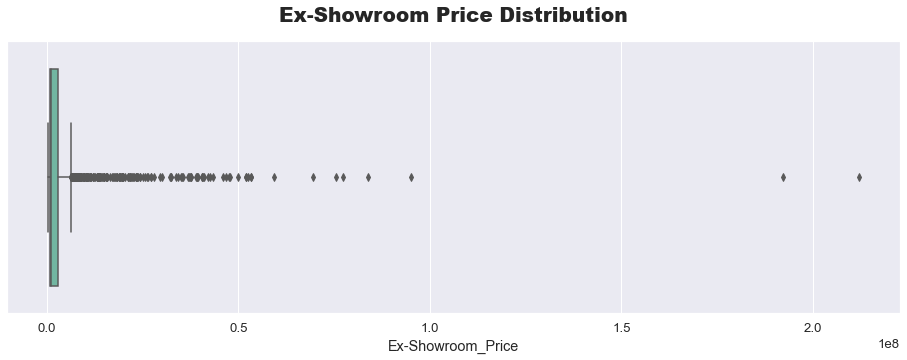

In [128]:
plt.figure(figsize=(16,5))
sns.boxplot(df["Ex-Showroom_Price"],palette="Set2")
plt.title("Ex-Showroom Price Distribution",fontweight="black",size=20,pad=20)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There **two cars** with **extremly high ex-showroom price** which can be considered as **extreme outliers.**  
* So for **better analysis** we can simply **drop these features.**

### Dropping Outliers.

In [129]:
df[df["Ex-Showroom_Price"]>150000000][["Car Manufacturer","Car Model","Ex-Showroom_Price"]]

Car Manufacturer Car Model  Ex-Showroom_Price
355          Bugatti    Chiron          192142937
356          Bugatti    Chiron          212155397

In [130]:
df.drop([355,356],inplace=True)

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2.🔍</b>Visualizing <b>Avg. Price by Car Manufacturer.</b></h2>

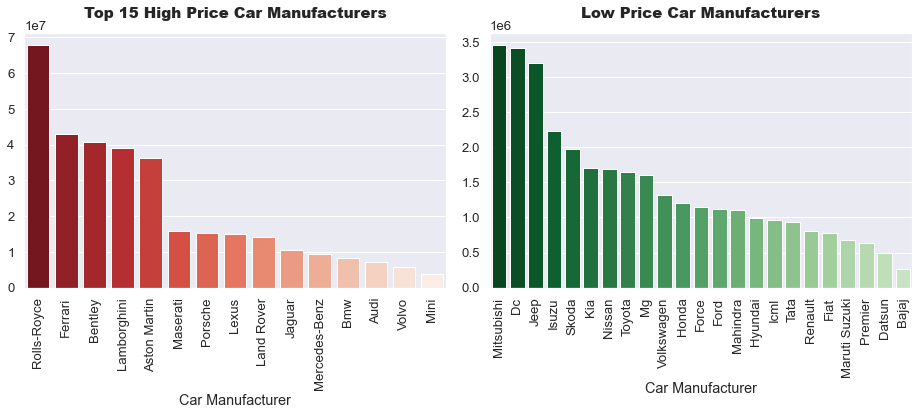

In [131]:
average_price1 = df.groupby(["Car Manufacturer"])["Ex-Showroom_Price"].mean().sort_values(ascending=False)[0:15]
average_price2 = df.groupby(["Car Manufacturer"])["Ex-Showroom_Price"].mean().sort_values(ascending=False)[15:]

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.barplot(x=average_price1.index, y=average_price1.values, palette=sns.color_palette("Reds",15)[::-1])
plt.title("Top 15 High Price Car Manufacturers",fontweight="black",size=15, pad=15)

plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=average_price2.index, y=average_price2.values, palette=sns.color_palette("Greens",30)[::-1])
plt.title("Low Price Car Manufacturers",fontweight="black",size=15, pad=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most Expensive Cars:-**
    1. **`Rolls-Royce.`**
    2. **`Ferrari.`**
    3. **`Bentley.`**
    
    
* **Cheapest Cars:-**
    1. **`Bajaj.`**
    2. **`Datsun.`**
    3. **`Premier.`**

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3.🔍</b>Visualizing <b> Displacement, Power & Torque</b> Features.</h2>

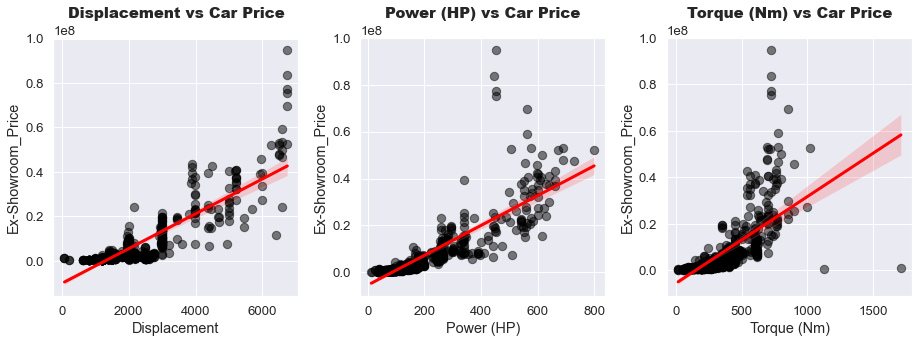

In [132]:
cols = ["Displacement","Power (HP)","Torque (Nm)"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can easily observe that **Displacement, Power & Torque** is **highly correlated with Car Price.**
* They are showing **Positive co-relation** among the features.
* So we can make an **inferencce** that **with increase in displacement, power or Torque value the price of the car will increase.**

----

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>4.🔍</b>Visualizing <b>Height, Length & Width</b> Features.</h2>

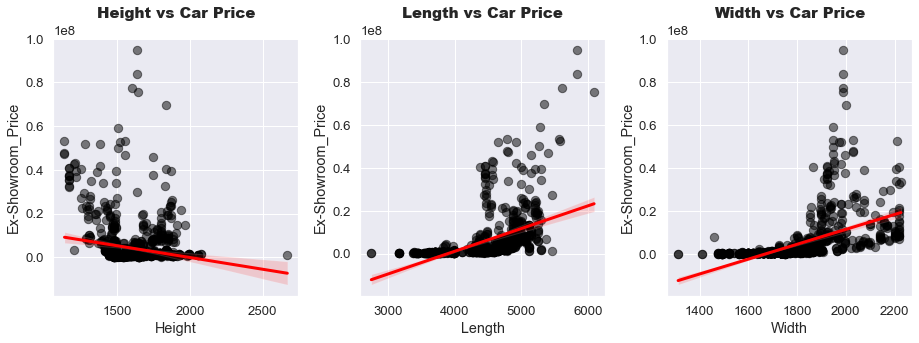

In [133]:
cols = ["Height","Length","Width"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* From **Height vs Car Price** we can observe a **negative correlation** among the features. 
* So we can make an **inference** that **with increase in car height the price of car decreases.**
    
    
* From **Length vs Car Price** & **Width vs Car Price** plot we can observe a **positive correlation.**
* So we make an **inference** that **with increase in length or width the price of the car will increase.**

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 21px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5.🔍</b>Visualizing <b>Weight, Wheelbase & Fuel_Tank_Capacity</b> Features</h2>

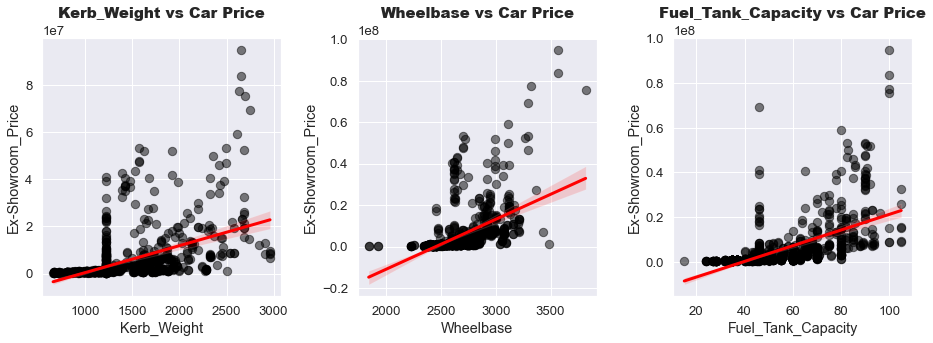

In [134]:
cols = ["Kerb_Weight","Wheelbase","Fuel_Tank_Capacity"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* From all the above plots we can obsereve a **positive correlation** among the features.
* So we can make an **inference** that with **increase in Kerb_Weight, Wheelbase or Fuel_Tank_Capacity** the **price of car will increase.**

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 21px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>6.🔍</b>Visualizing <b>Mileage, Ground_Clearnace & Boot_Space</b> Features.</h2>

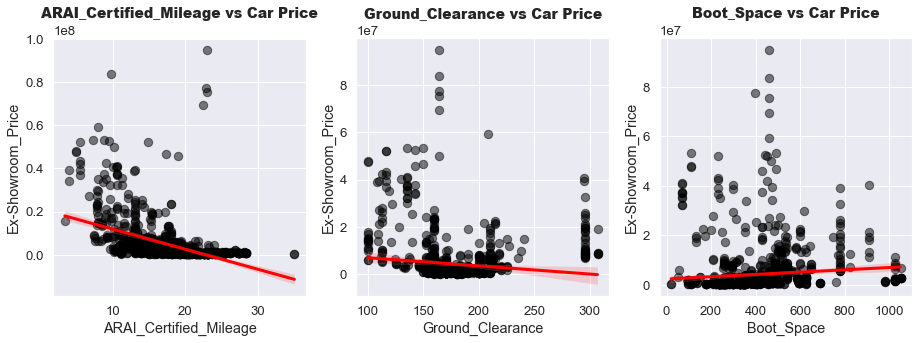

In [135]:
cols = ["ARAI_Certified_Mileage","Ground_Clearance","Boot_Space"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=14)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* From first plot we can observe a **negative correlation** between **Mileage and Car Price.**
* **Inference:** With **increase** in mileage the **price of car decreases.**
 
    
* From the other two plots we **can't observe a correlation** among the features.
* **Inference:** Since there is **not much correlation** we can **drop** these features.

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7.🔍</b>Visualizing <b>Cyclinders, Doors, Valves_Per_Cyclinder</b> Features.</h2>

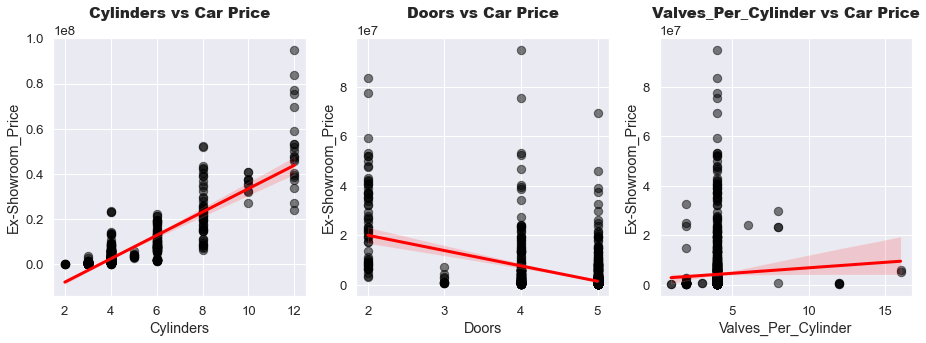

In [136]:
cols = ['Cylinders','Doors','Valves_Per_Cylinder']

plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* From **Cylinder vs Car Price** we can clearly observe a **high positive correlation.**
* **Inference:** With **increase** in **number of cyclinders** the **price of car will increase.**
  
    
* From **Doors vs Car Price** we can clearly obsevre a **high negative correation.** 
* **Inference:** With **increase** in **number of doors** the **price of car will decrease.**
    
    
* In **Valves_Per_Cyclinder** we can observe **very few** data-points for **valves greater than 5.**
* Hence, if required we can **drop** this features.    

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8.🔍</b>Visualizing <b>Seating_Capacity & Number_of_Airbags</b> Features.</h2>

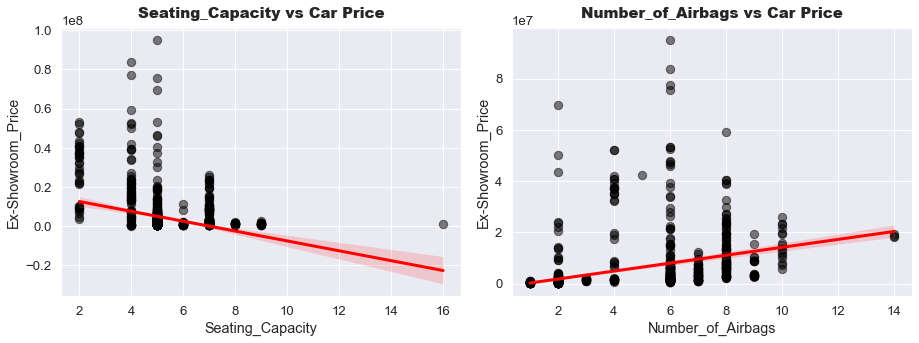

In [137]:
cols =['Seating_Capacity','Number_of_Airbags']

plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,2,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
   
    plt.title(f"{column} vs Car Price",pad=10,fontweight="black",size=15)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* From **Seating_Capacity vs Car Price** we can observe a **negative correlation.**
* **Inference:** With **increase** in **seating capacity of car** the **price of car decreases.**
    
    
* From **Number_of_Airbags vs Car Price** we can observe a **positive correlation.**
* **Infernece:** With **increase** in **number of airbages in car** the **price of car increases.**

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>9.🔍</b>Visualizing <b>Odometer, Speedometer, Tachometer & Tripmeter</b></h2>

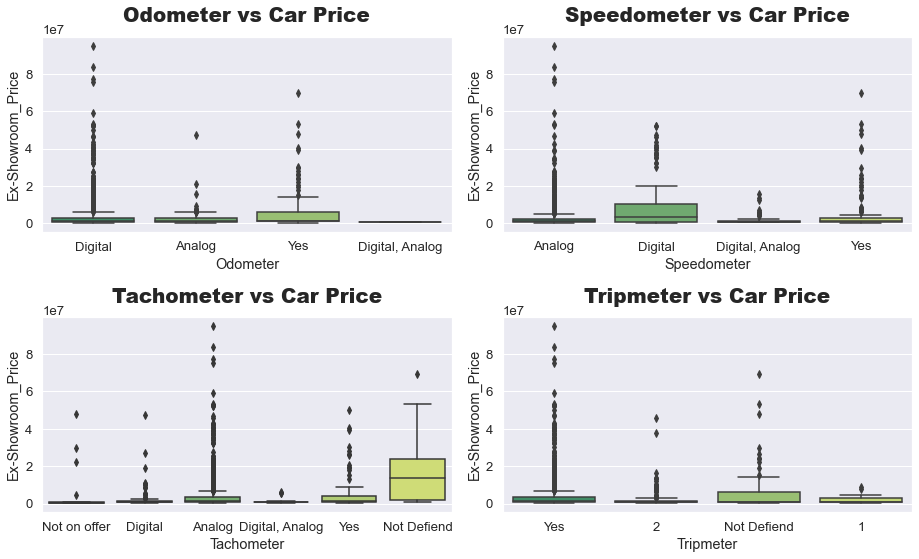

In [138]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.boxplot(df[column], df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=20,pad=15)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Cars having **Digital Odometer** are **more expensive cars** when compared with cars having **Analog Odometer.**
* Cars having **Analog Speedometer** are **more expensive cars** when compared with cars having **Digital Speedomter.**
* Cars having **Analog Tachomter** are **more expensive cars** when compared with cars having **Digital Tachometer.**
* Cars having **Tripmeter more than 1** are **more expensive.**

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;"><b>10.🔍</b>Visualizing <b>Fuel_Type, Power_Steering, Emission_Norm & Drivetrain.</b></h2>

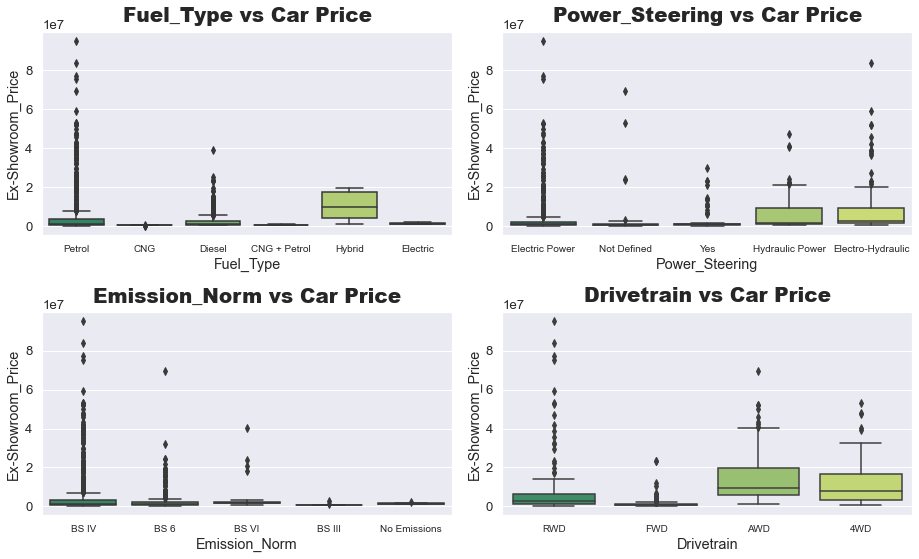

In [139]:
cols = ["Fuel_Type","Power_Steering","Emission_Norm","Drivetrain"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.boxplot(df[column], df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=20,pad=10)
    plt.xticks(size=10)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Cars having **Petrol Fuel Type** are **more expensive cars** when compared with **any other fuel types.**
* Cars having **Electric Power** or **Electro-Hydraulic** **Power Steering** are **more expensive cars** when compared with any **other power steering.**
* Cars having **BS IV Emission Norm** are **more expensive cars** when compared with cars having **any other Emission_Norms.**
* Cars having **RWD Drivetrain** are **more expensive** when compared with cars having **any other Drivetrains.**

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>11.🔍</b>Visualizing <b>Body_Type & Engine_Location.</b></h2>

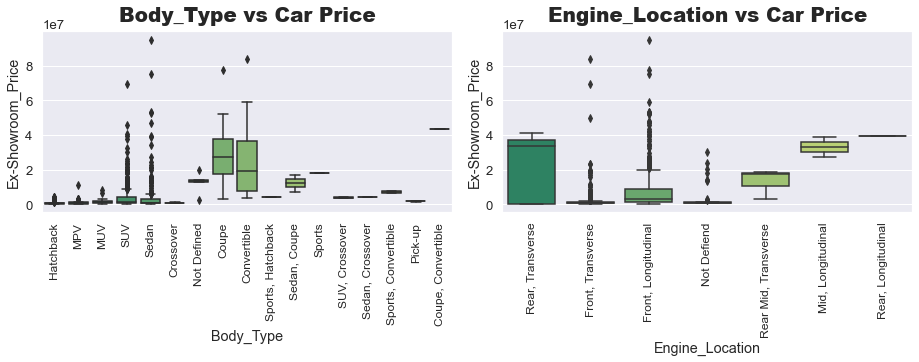

In [140]:
cols = ["Body_Type","Engine_Location"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.boxplot(df[column], df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=20,pad=10)
    plt.xticks(size=12,rotation=90)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Cars with **Sedan or SUV Body Type** are **more expensive cars.**
* Cars with **Front, Longitudinal** or **Front, Transverse Engine Location** are **more expensive cars.**

    
* **Note:** 
    1. There are very **few data-points** for cars having **Sports Body Type** and **Mid, Transverse Engine Location.**
    2. So we can't consider them as **expensive cars.**

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;"><b>12.🔍</b>Visualizing <b>Cycliner_Configuration, Keyless_Entry & Seats_Material.</b></h2>

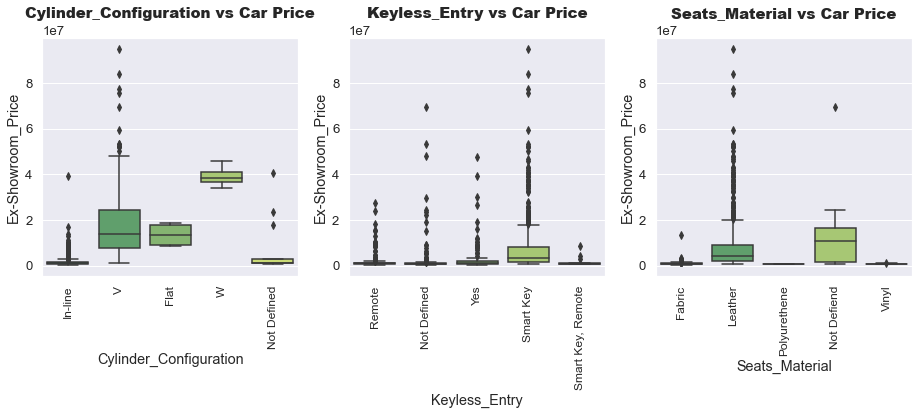

In [141]:
cols = ["Cylinder_Configuration","Keyless_Entry","Seats_Material"]

plt.figure(figsize=(13,6))
for index,column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.boxplot(df[column], df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=15,pad=20)
    plt.xticks(size=12,rotation=90)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Cars with **V cylinder configuration** are **more expensive cars.**
* Cars with **Smart key Entry** are **more expensive cars.**
* Cars with **Leather Seats Material** are **more expensive cars.**
    
 
* **Note:**
    1. There are **very few data-points** for **W cyclinder Configuration** and **SmartKey, Remote Keyless Entry.**
    2. So we can't consider them as **expensive cars.**

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 17px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;"><b>13.🔍</b>Visualizing <b>Seat_Height_Adjustment, Adjustable_Steering & Parking_Assistance.</b></h2>

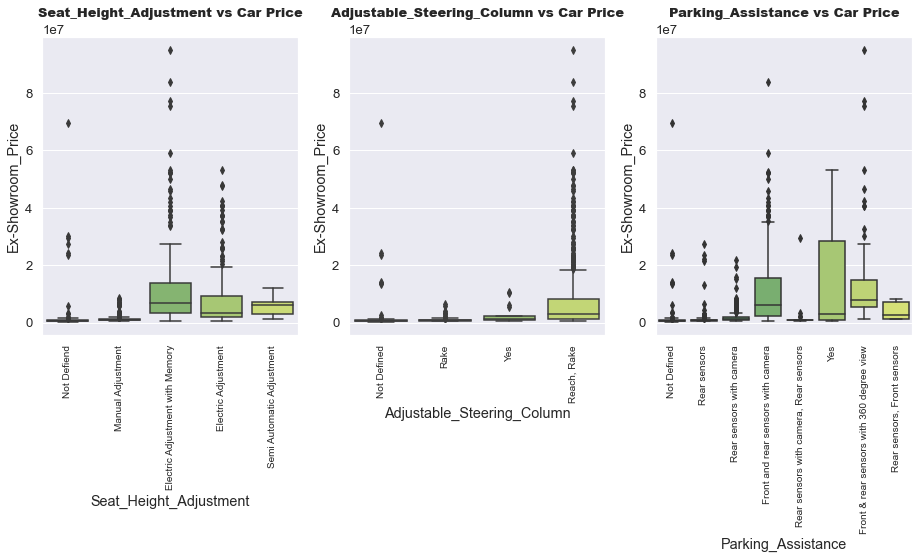

In [142]:
cols = ["Seat_Height_Adjustment","Adjustable_Steering_Column","Parking_Assistance"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.boxplot(df[column], df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=13,pad=20)
    plt.xticks(rotation=90,size=10)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Cars with **Electric Adjustment with Memory** as **Seat Height Adjustment** are **expensive cars.**
* Cars with **Reach,Rake** as **Adjustable_Steering** are **expensive cars.**
* cars with **Front & Rear sensors with camera or with 360 degree view** as **parking assistance** are **expensive cars.**

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">Data Preprocessing.</p>

### 1. Performing Feature Selection on Binary Categorical Features.

In [143]:
cols = ['Central_Locking','Child_Safety_Locks','Low_Fuel_Warning','Third_Row_AC_Vents','Second_Row_AC_Vents',
        'Auto-Dimming_Rear-View_Mirror','Engine_Immobilizer','ABS_(Anti-lock_Braking_System)',
        'EBD_(Electronic_Brake-force_Distribution)','Cooled_Glove_Box','EBA_(Electronic_Brake_Assist)',
        'ESP_(Electronic_Stability_Program)','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility',
        'Bluetooth','Navigation_System','Turbocharger',"Automatic_Headlamps","Cruise_Control"]

In [144]:
x = df[cols]
y = df["Ex-Showroom_Price"]

In [145]:
enc = LabelEncoder()
x[cols] = x[cols].apply(enc.fit_transform)

In [146]:
selector = SelectKBest(score_func=f_regression, k=5) 
selector.fit(x, y)

SelectKBest(k=5, score_func=<function f_regression at 0x00000181586CA700>)

### Visualizing the F-score of the these features.

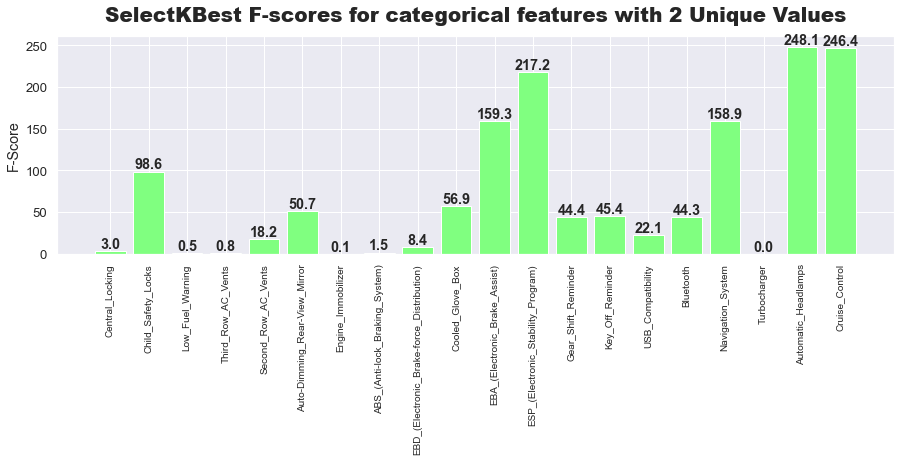

In [147]:
scores = selector.scores_
feature_names = x.columns

plt.figure(figsize=(15, 4))
plt.bar(feature_names,scores,color=(0.5, 1.0, 0.5))
for index,value in enumerate(scores):
    plt.text(index,value,round(value,1),ha="center",fontweight="bold",va="bottom")
plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for categorical features with 2 Unique Values',pad=15,fontweight="black",size=20)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* From the visualization we can clearly observe that only **5 features** are having **strong statistical relationship with the target varaiable.**
* So we can **use these 5 features to train model** to build **more accurate & efficient models* and to **reduce the risk of overfitting.**

### Selecting Useful Features.

In [148]:
useful_features_1 = x.columns[selector.get_support(indices=True)]
useful_features_1

Index(['EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Navigation_System', 'Automatic_Headlamps', 'Cruise_Control'],
      dtype='object')

---

### 2. Perforimg Feature Selection on Categorical Features having multiple categories.

In [149]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter","Fuel_Type","Power_Steering","Emission_Norm","Drivetrain",
        "Body_Type","Engine_Location","Cylinder_Configuration","Keyless_Entry","Seats_Material",
        "Seat_Height_Adjustment","Adjustable_Steering_Column","Parking_Assistance"]

In [150]:
x = df[cols]
y = df["Ex-Showroom_Price"]

In [151]:
enc = LabelEncoder()
x[cols] = x[cols].apply(enc.fit_transform)

In [152]:
selector = SelectKBest(score_func = f_regression, k=5)
selector.fit(x,y)

SelectKBest(k=5, score_func=<function f_regression at 0x00000181586CA700>)

### Visualizing the F-score of these Features.

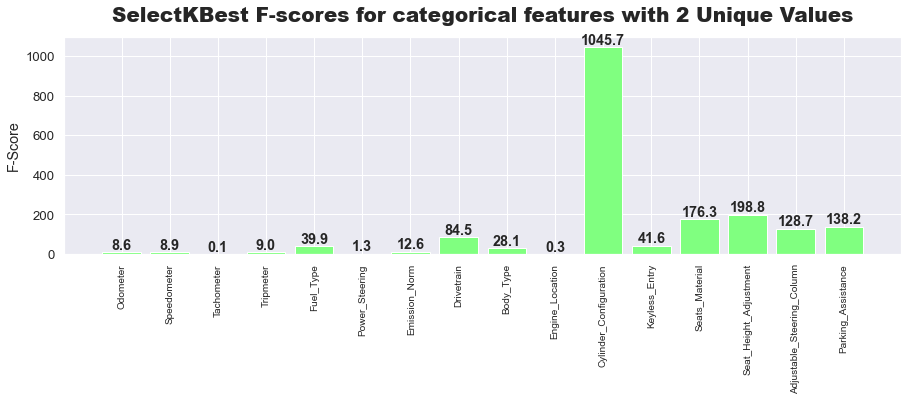

In [153]:
scores = selector.scores_
feature_names = x.columns

plt.figure(figsize=(15, 4))
plt.bar(feature_names,scores,color=(0.5, 1.0, 0.5))
for index,value in enumerate(scores):
    plt.text(index,value,round(value,1),ha="center",fontweight="bold",va="bottom")
plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for categorical features with 2 Unique Values',pad=15,fontweight="black",size=20)
plt.show()

### Selecting Useful Features.

In [154]:
useful_features_2 = x.columns[selector.get_support(indices=True)]
useful_features_2

Index(['Cylinder_Configuration', 'Seats_Material', 'Seat_Height_Adjustment',
       'Adjustable_Steering_Column', 'Parking_Assistance'],
      dtype='object')

---

### 3. Performing Feature Selection on Discrete Numerical Features.

In [155]:
cols = ['Cylinders','Doors','Valves_Per_Cylinder','Seating_Capacity','Number_of_Airbags']

In [156]:
x = df[cols]
y = df["Ex-Showroom_Price"]

In [157]:
selector = SelectKBest(score_func=f_regression,k=1)
selector.fit(x,y)

SelectKBest(k=1, score_func=<function f_regression at 0x00000181586CA700>)

### Visualizing the F-score of these features.

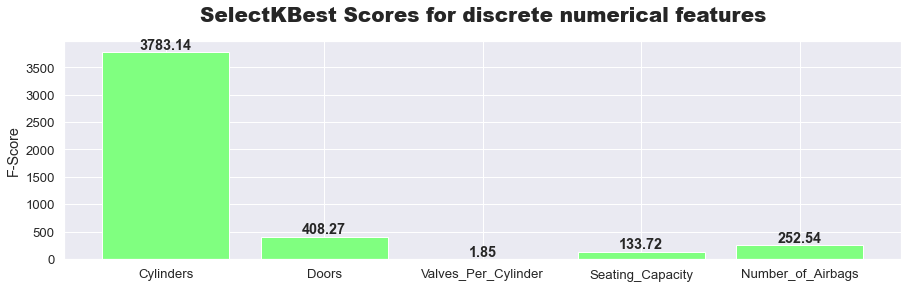

In [158]:
scores = selector.scores_
feature_names = x.columns

plt.figure(figsize=(15, 4))
plt.bar(feature_names, scores,color=(0.5, 1.0, 0.5))
for index,value in enumerate(scores):
    plt.text(index,value,round(value,2),ha="center",fontweight="bold",va="bottom")
plt.ylabel('F-Score')
plt.title('SelectKBest Scores for discrete numerical features',pad=20,fontweight="black",size=20)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

1. The **independent feature**, **cyclinders** is having the **strongest statistical relationship with the dependent variable.**
2. **No others** features is having **strong statistical relationship.** So simply we can **drop these features.**

### Selecting Useful Features.

In [159]:
useful_features_3 = x.columns[selector.get_support(indices=True)]
useful_features_3

Index(['Cylinders'], dtype='object')

---

### 4. Performing Feature Selection on Continous Numerical Features.

In [160]:
cols = ["Displacement","Power (HP)","Torque (Nm)","Height","Length","Width","Kerb_Weight","Wheelbase","Fuel_Tank_Capacity",
        "ARAI_Certified_Mileage","Ground_Clearance","Boot_Space",'Ex-Showroom_Price']

In [161]:
new_df = df[cols]
corr = new_df.corr()["Ex-Showroom_Price"].to_frame().rename(columns={"Ex-Showroom_Price":"Correlation with Price"})

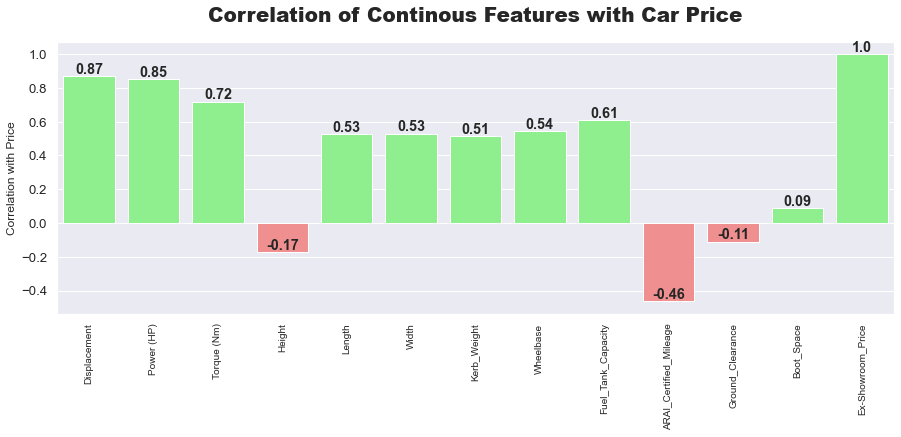

In [162]:
positive_color = (0.5, 1.0, 0.5)
negative_color = (1.0, 0.5, 0.5)
colors = [positive_color if c >= 0 else negative_color for c in corr["Correlation with Price"]]

plt.figure(figsize=(15,5))
ax = sns.barplot(corr.index,corr["Correlation with Price"],palette=colors)
for i, val in enumerate(corr["Correlation with Price"]):
    ax.text(i, val, round(val, 2), ha='center', va='bottom', fontweight='bold')
plt.title("Correlation of Continous Features with Car Price",fontweight="black",size=20,pad=20)
plt.ylabel("Correlation with Price",size=12)
plt.xticks(rotation=90,size=10)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* From the above visualization we can observe that **most of the numerical features** is having **strong correlation** with **Car Price.**
* **Three features** are **not having strong correlation with car price.** So we can **drop these features.** 
    1. **`Height`**
    2. **`Boot_space`**
    3. **`Ground_Clearnace`**

### Selecting Useful Features.

In [163]:
useful_features_4 = ["Displacement","Power (HP)","Torque (Nm)","Length","Width","Kerb_Weight","Wheelbase",
                    "Fuel_Tank_Capacity","ARAI_Certified_Mileage",'Ex-Showroom_Price']

---

### 5. Creating Data-Frame with Useful Features.

In [164]:
useful_cols = []
useful_cols.extend(useful_features_1.tolist())
useful_cols.extend(useful_features_2.tolist())
useful_cols.extend(useful_features_3.tolist())
useful_cols.extend(useful_features_4)

In [165]:
df = df[useful_cols]
df.sample(5)

EBA_(Electronic_Brake_Assist) ESP_(Electronic_Stability_Program)  \
923                            Yes                        Not Defiend   
449                    Not Defiend                        Not Defiend   
1240                           Yes                                Yes   
137                    Not Defiend                        Not Defiend   
1092                   Not Defiend                        Not Defiend   

     Navigation_System Automatic_Headlamps Cruise_Control  \
923        Not Defiend         Not Defiend    Not Defiend   
449        Not Defiend         Not Defiend    Not Defiend   
1240               Yes                 Yes    Not Defiend   
137        Not Defiend         Not Defiend    Not Defiend   
1092       Not Defiend                 Yes            Yes   

     Cylinder_Configuration Seats_Material Seat_Height_Adjustment  \
923                 In-line         Fabric      Manual Adjustment   
449                 In-line         Fabric      Manual Adjustment   
1240                In-line        Leather      Manual Adjustment   
137                 In-line         Fabric      Manual Adjustment   
1092                In-line         Fabric      Manual Adjustment   

     Adjustable_Steering_Column        Parking_Assistance  Cylinders  \
923                        Rake              Rear sensors        4.0   
449                 Not Defined  Rear sensors with camera        4.0   
1240                Reach, Rake              Rear sensors        4.0   
137                        Rake  Rear sensors with camera        4.0   
1092                Reach, Rake  Rear sensors with camera        4.0   

      Displacement  Power (HP)  Torque (Nm)  Length   Width  Kerb_Weight  \
923         1498.0       97.65        134.0  4455.0  1695.0       1225.0   
449         1994.0      120.33        270.0  4440.0  1645.0       1710.0   
1240        1968.0      141.04        320.0  4670.0  1814.0       1340.0   
137         1197.0       81.86        114.0  3995.0  1680.0       1225.0   
1092        1248.0       90.23        200.0  4490.0  1730.0       1105.0   

      Wheelbase  Fuel_Tank_Capacity  ARAI_Certified_Mileage  Ex-Showroom_Price  
923      2600.0                41.0                   16.95             836461  
449      2541.0                50.0                   11.12             927689  
1240     2688.0                50.0                   21.00            1799599  
137      2450.0                37.0                   20.10             804800  
1092     2650.0                43.0                   28.09            1062689

---

### 6. Computing Skewness of Continous Numerical Features.

In [166]:
cols = ["Displacement","Power (HP)","Torque (Nm)","Length","Width","Kerb_Weight","Wheelbase",
        "Fuel_Tank_Capacity","ARAI_Certified_Mileage",'Ex-Showroom_Price']

In [167]:
df[cols].skew().to_frame().rename(columns={0:"Skewness"})

Skewness
Displacement            2.475382
Power (HP)              2.425332
Torque (Nm)             1.721639
Length                  0.240663
Width                   0.772992
Kerb_Weight             1.354881
Wheelbase               0.990579
Fuel_Tank_Capacity      1.009603
ARAI_Certified_Mileage -0.233279
Ex-Showroom_Price       4.529864

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Excluding Length & ARAI_Certified_Mileage** all the features are highly **skewed**.
* **Specially Target variable** is highly skewed which can create more **bias in model.**

### 7. Visualizing which Transformation will have best fit for target variable.

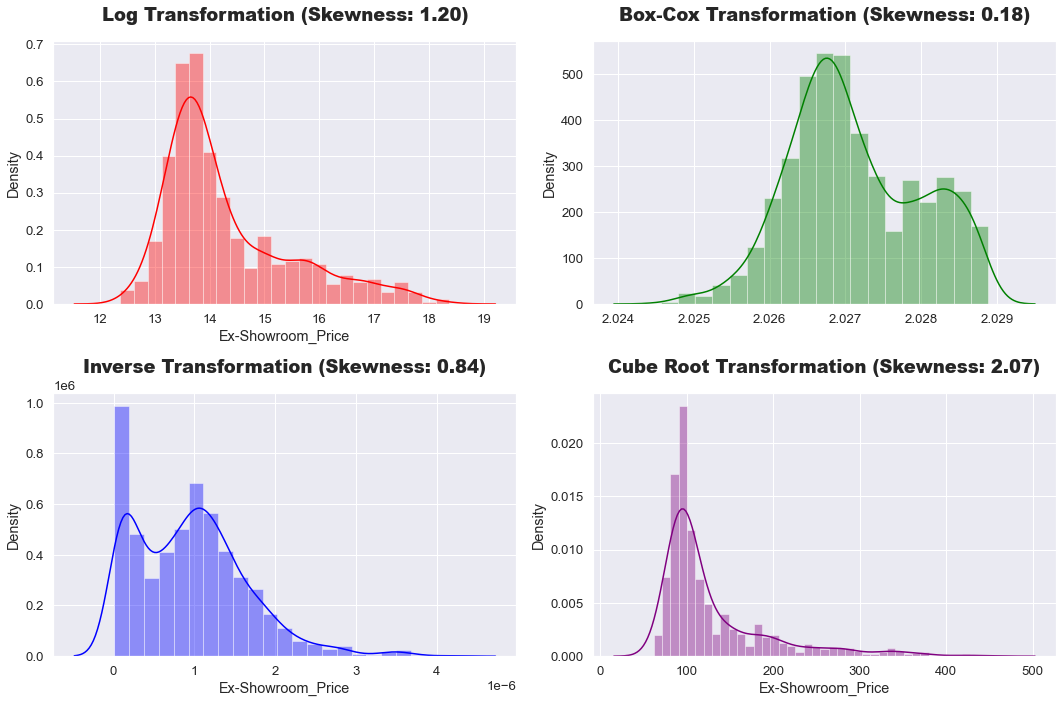

In [168]:
import numpy as np
import scipy.stats as stats

plt.figure(figsize=(15, 10))

# Log Transformation
transformed_log = np.log(df["Ex-Showroom_Price"])
skewness_log = stats.skew(transformed_log)
plt.subplot(2, 2, 1)
sns.distplot(transformed_log, kde=True, color="red")
plt.title(f"Log Transformation (Skewness: {skewness_log:.2f})", fontweight="black", size=18, pad=20)

# Box-Cox Transformation
transformed_boxcox, lambda_param = stats.boxcox(df["Ex-Showroom_Price"])
skewness_boxcox = stats.skew(transformed_boxcox)
plt.subplot(2, 2, 2)
sns.distplot(transformed_boxcox, kde=True, color="green")
plt.title(f"Box-Cox Transformation (Skewness: {skewness_boxcox:.2f})", fontweight="black", size=18, pad=20)

# Inverse Transformation
transformed_inverse = 1 / df["Ex-Showroom_Price"]
skewness_inverse = stats.skew(transformed_inverse)
plt.subplot(2, 2, 3)
sns.distplot(transformed_inverse, kde=True, color="blue")
plt.title(f"Inverse Transformation (Skewness: {skewness_inverse:.2f})", fontweight="black", size=18, pad=20)

# Cube Root Transformation
transformed_cbrt = np.cbrt(df["Ex-Showroom_Price"])
skewness_cbrt = stats.skew(transformed_cbrt)
plt.subplot(2, 2, 4)
sns.distplot(transformed_cbrt, kde=True, color="purple")
plt.title(f"Cube Root Transformation (Skewness: {skewness_cbrt:.2f})", fontweight="black", size=18, pad=20)

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The best fit was given by **Box-Cox** Transformation followed by **Inverse Transformation.**
* So we can use **Box-Cox** Transformation on the target variable to **reduce skewness and achieve a normal distribution.**

### 8. Applying Box-Cox Tansformation.

In [169]:
for column in cols:
    df[column], lamda_param = stats.boxcox(df[column])

In [170]:
df[cols].skew().to_frame().rename(columns={0:"Skewness"})

Skewness
Displacement           -0.001349
Power (HP)             -0.104279
Torque (Nm)            -0.000175
Length                 -0.000922
Width                   0.000000
Kerb_Weight            -0.007802
Wheelbase               0.000000
Fuel_Tank_Capacity      0.000591
ARAI_Certified_Mileage -0.021456
Ex-Showroom_Price       0.184044

---

### 9. Encoding Categorical Features.

In [171]:
cat_cols = df.select_dtypes(include=["object"]).columns

In [172]:
df = pd.get_dummies(df,columns=cat_cols)

In [173]:
df.sample(5)

Cylinders  Displacement  Power (HP)  Torque (Nm)     Length     Width  \
649        4.0      7.272940    2.153640     5.520395  17.054420  0.771389   
588        4.0      7.051597    2.137668     5.139832  16.566399  0.771387   
364        3.0      6.647639    1.978972     4.132483  16.052850  0.771373   
127        4.0      7.051597    2.090058     4.609287  16.566399  0.771384   
860        8.0      8.240354    2.327103     6.309939  17.027789  0.771393   

     Kerb_Weight  Wheelbase  Fuel_Tank_Capacity  ARAI_Certified_Mileage  \
649     1.765285   0.604896            1.923004               27.817942   
588     1.765285   0.604896            1.908388               27.195798   
364     1.754599   0.604896            1.867705               38.017276   
127     1.769142   0.604896            1.923004               29.595639   
860     1.770368   0.604896            2.019230                9.719856   

     Ex-Showroom_Price  EBA_(Electronic_Brake_Assist)_Not Defiend  \
649           2.026881                                          1   
588           2.027061                                          0   
364           2.025627                                          1   
127           2.026635                                          1   
860           2.028647                                          0   

     EBA_(Electronic_Brake_Assist)_Yes  \
649                                  0   
588                                  1   
364                                  0   
127                                  0   
860                                  1   

     ESP_(Electronic_Stability_Program)_Not Defiend  \
649                                               1   
588                                               0   
364                                               1   
127                                               1   
860                                               0   

     ESP_(Electronic_Stability_Program)_Yes  Navigation_System_Not Defiend  \
649                                       0                              1   
588                                       1                              0   
364                                       0                              1   
127                                       0                              0   
860                                       1                              0   

     Navigation_System_Yes  Automatic_Headlamps_Not Defiend  \
649                      0                                1   
588                      1                                1   
364                      0                                1   
127                      1                                0   
860                      1                                0   

     Automatic_Headlamps_Yes  Cruise_Control_Not Defiend  Cruise_Control_Yes  \
649                        0                           1                   0   
588                        0                           1                   0   
364                        0                           1                   0   
127                        1                           1                   0   
860                        1                           0                   1   

     Cylinder_Configuration_Flat  Cylinder_Configuration_In-line  \
649                            0                               1   
588                            0                               1   
364                            0                               1   
127                            0                               1   
860                            0                               0   

     Cylinder_Configuration_Not Defined  Cylinder_Configuration_V  \
649                                   0                         0   
588                                   0                         0   
364                                   0                         0   
127                                   0                         0   
860

---

### 10. Segregating Features & Labels for Model Training.

In [174]:
X = df.drop(columns="Ex-Showroom_Price")
y = df["Ex-Showroom_Price"]

In [175]:
X.shape

(1274, 47)

---

### 10. Scaling Features using Robust Scaler.

In [176]:
from sklearn.preprocessing import RobustScaler

In [177]:
scaler = RobustScaler()

In [178]:
x_scaled = scaler.fit_transform(X)

---

### 11. Splitting Data for Model Training & Tetsing.

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [180]:
print("Dimension of x_train:=>",x_train.shape)
print("Dimension of x_test:=>",x_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of x_train:=> (1019, 47)
Dimension of x_test:=> (255, 47)
Dimension of y_train:=> (1019,)
Dimension of y_test:=> (255,)


---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">Model Creation & Evaulation.</p>

## 1.  Creating a Function for Model Training & Model Evaluation.

In [181]:
r2score = []
adj_r2_score = []
mae_score = []
mse_score = []
rmse_score = []
mpe_score = []
mape_score = []

In [182]:
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    n= len(y)
    k = X.shape[1]
    
    #Metric Calculation
    r2 = r2_score(y_test, y_test_pred)
    adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    mpe = np.mean((y_test - y_test_pred) / y_test) * 100
    mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    #Appending Metric Value
    r2score.append(r2)
    adj_r2_score.append(adj_r2)
    mae_score.append(mae)
    mse_score.append(mse)
    rmse_score.append(rmse)
    mpe_score.append(mpe)
    mape_score.append(mape)
    
    #Returning Metric Value
    print("-"*127)
    print("R-squared:", r2)
    print("Adjusted R-Squared",adj_r2)
    print()
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Percentage Error (MPE):", mpe)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("-"*127)
    
    #Scatter plot
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot', fontweight="black", size=20, pad=10)
    
    # Residual plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot', fontweight="black", size=20, pad=10)

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 1. Linear Regression Model</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9521572488219016
Adjusted R-Squared 0.9503231466152371

Mean Absolute Error (MAE): 0.00014451702298840245
Mean Squared Error (MSE): 3.5943628329286204e-08
Root Mean Squared Error (RMSE): 0.00018958804901492659
Mean Percentage Error (MPE): -0.0008376497808823735
Mean Absolute Percentage Error (MAPE): 0.007129111596980996
-------------------------------------------------------------------------------------------------------------------------------


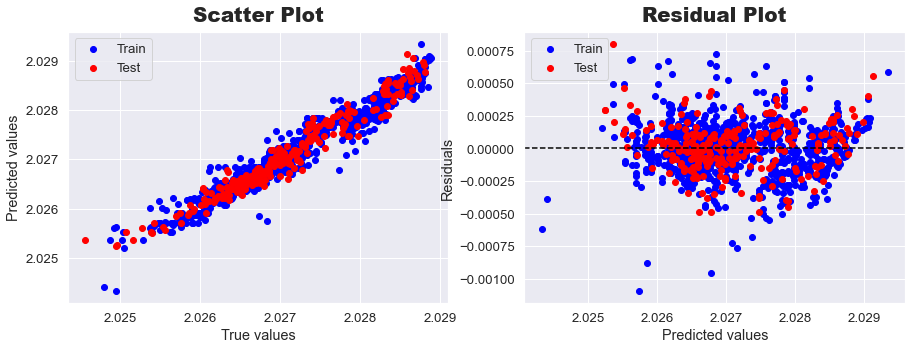

In [183]:
model_evaluation(LinearRegression())

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 2. RidgeCV Regression Model</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9524335838593547
Adjusted R-Squared 0.9506100752471114

Mean Absolute Error (MAE): 0.00014427551511557202
Mean Squared Error (MSE): 3.57360214581094e-08
Root Mean Squared Error (RMSE): 0.00018903973513023498
Mean Percentage Error (MPE): -0.0008133475389315993
Mean Absolute Percentage Error (MAPE): 0.007117217924554095
-------------------------------------------------------------------------------------------------------------------------------


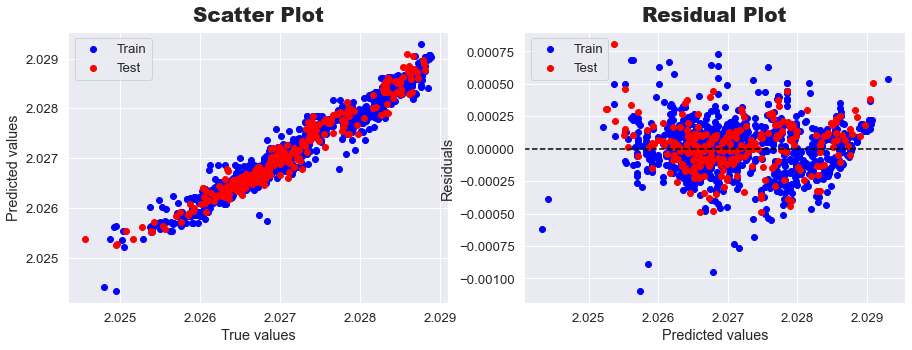

In [184]:
model_evaluation(RidgeCV())

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 3. LassoCV Regression Model</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9535019242880012
Adjusted R-Squared 0.9517193716302003

Mean Absolute Error (MAE): 0.00014247164117569554
Mean Squared Error (MSE): 3.4933391376208964e-08
Root Mean Squared Error (RMSE): 0.0001869047655256788
Mean Percentage Error (MPE): -0.0007808386808073391
Mean Absolute Percentage Error (MAPE): 0.007028294539041314
-------------------------------------------------------------------------------------------------------------------------------


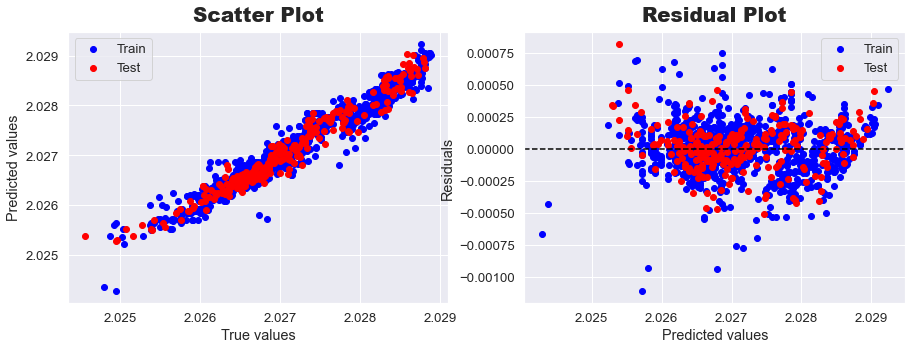

In [185]:
model_evaluation(LassoCV())

----

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 4. ElasticNetCV Regression Model</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9535017488158738
Adjusted R-Squared 0.9517191894311642

Mean Absolute Error (MAE): 0.00014247181449566308
Mean Squared Error (MSE): 3.49335232061053e-08
Root Mean Squared Error (RMSE): 0.00018690511819130395
Mean Percentage Error (MPE): -0.0007808319928261621
Mean Absolute Percentage Error (MAPE): 0.007028303096056304
-------------------------------------------------------------------------------------------------------------------------------


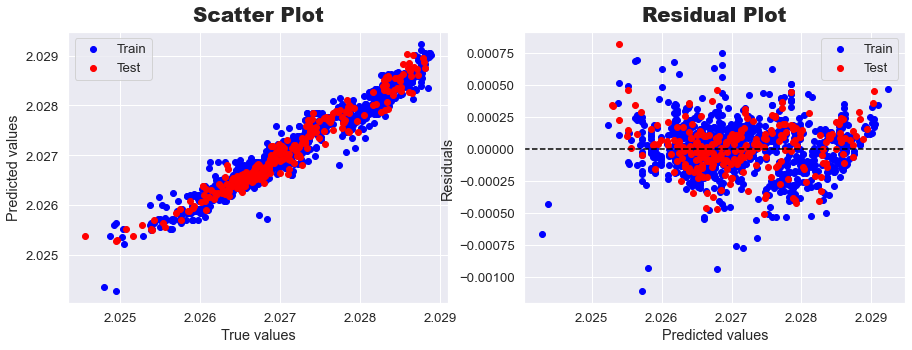

In [186]:
model_evaluation(ElasticNetCV())

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 5. DecisionTree Regressor Model</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.962533083257423
Adjusted R-Squared 0.961096749581321

Mean Absolute Error (MAE): 0.00010815168259404807
Mean Squared Error (MSE): 2.81484006851176e-08
Root Mean Squared Error (RMSE): 0.0001677748511700058
Mean Percentage Error (MPE): 0.00017449182125417874
Mean Absolute Percentage Error (MAPE): 0.005335811818554727
-------------------------------------------------------------------------------------------------------------------------------


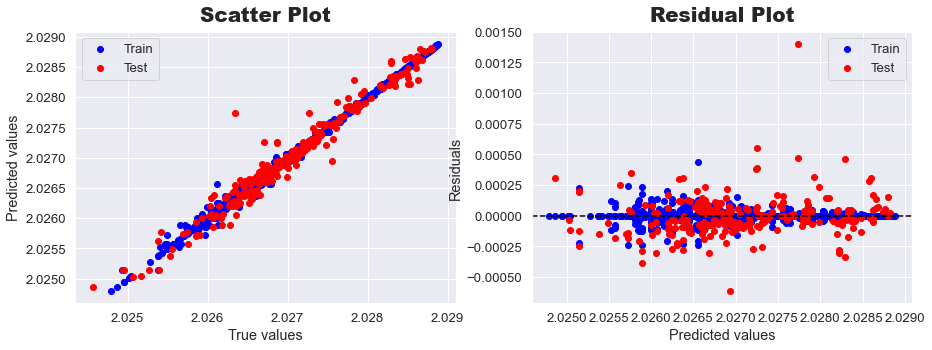

In [187]:
model_evaluation(DecisionTreeRegressor())

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 6. Random Forest Regressor Model</div>

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9761641569368349
Adjusted R-Squared 0.97525038481288

Mean Absolute Error (MAE): 9.31112480334369e-05
Mean Squared Error (MSE): 1.790755470537833e-08
Root Mean Squared Error (RMSE): 0.00013381911188383493
Mean Percentage Error (MPE): 0.00017906635095364198
Mean Absolute Percentage Error (MAPE): 0.004593898627971056
-------------------------------------------------------------------------------------------------------------------------------


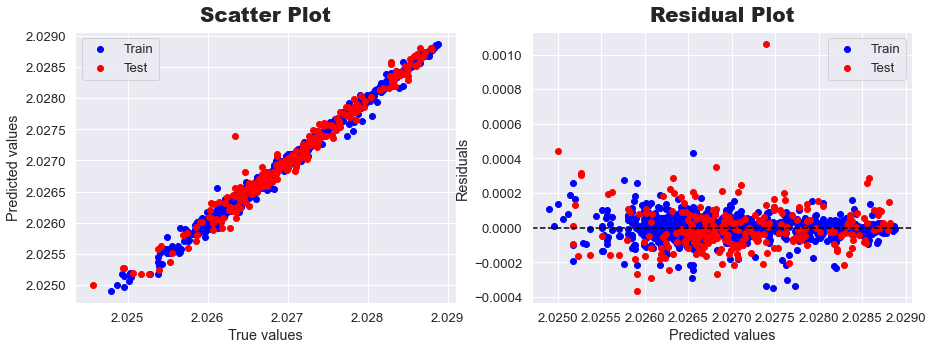

In [188]:
model_evaluation(RandomForestRegressor())

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 7. Gradient Boosting Regressor Model</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9725787808734856
Adjusted R-Squared 0.9715275595856012

Mean Absolute Error (MAE): 0.00010258364964764406
Mean Squared Error (MSE): 2.0601200481768036e-08
Root Mean Squared Error (RMSE): 0.00014353118295955077
Mean Percentage Error (MPE): -0.00018391361562043585
Mean Absolute Percentage Error (MAPE): 0.005061017450009494
-------------------------------------------------------------------------------------------------------------------------------


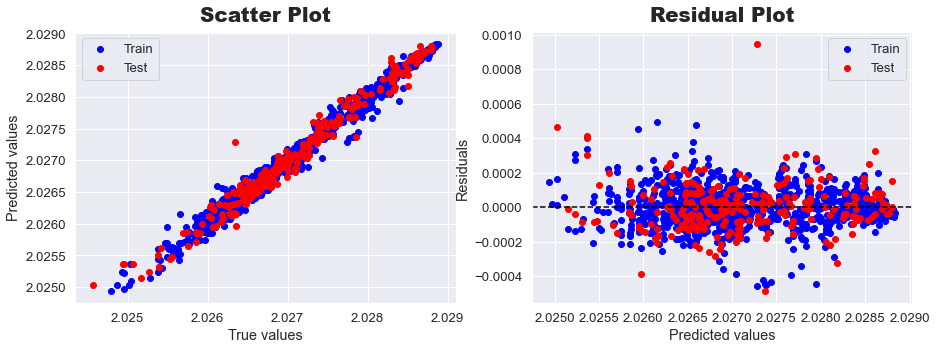

In [189]:
model_evaluation(GradientBoostingRegressor())

----

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 8. AdaBoost Regressor Model</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9501489530595998
Adjusted R-Squared 0.9482378607217541

Mean Absolute Error (MAE): 0.00014798707289111207
Mean Squared Error (MSE): 3.7452434463505756e-08
Root Mean Squared Error (RMSE): 0.0001935263146538624
Mean Percentage Error (MPE): -4.6515939111590275e-05
Mean Absolute Percentage Error (MAPE): 0.0073006741811938265
-------------------------------------------------------------------------------------------------------------------------------


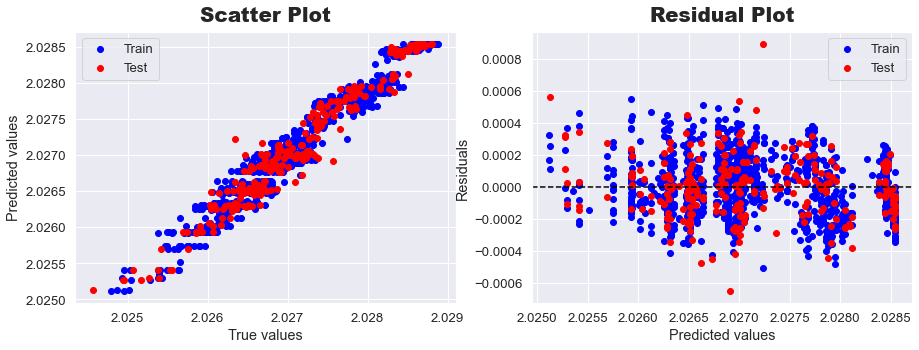

In [190]:
model_evaluation(AdaBoostRegressor())

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 9. XGBRegressor Model</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.953066337568618
Adjusted R-Squared 0.9512670862356042

Mean Absolute Error (MAE): 0.00014402596650970703
Mean Squared Error (MSE): 3.526064193687169e-08
Root Mean Squared Error (RMSE): 0.0001877781721523343
Mean Percentage Error (MPE): -0.0006742166068651962
Mean Absolute Percentage Error (MAPE): 0.007105422982987558
-------------------------------------------------------------------------------------------------------------------------------


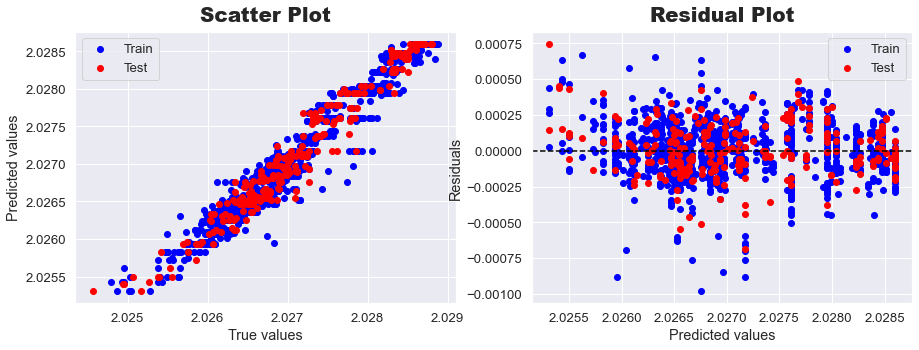

In [191]:
model_evaluation(XGBRegressor())

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 10. LGBM Regressor Model.</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9791857760713132
Adjusted R-Squared 0.978387840896233

Mean Absolute Error (MAE): 8.819989770722721e-05
Mean Squared Error (MSE): 1.5637452078586583e-08
Root Mean Squared Error (RMSE): 0.00012504979839482583
Mean Percentage Error (MPE): 0.0001459612867152034
Mean Absolute Percentage Error (MAPE): 0.004351647748608291
-------------------------------------------------------------------------------------------------------------------------------


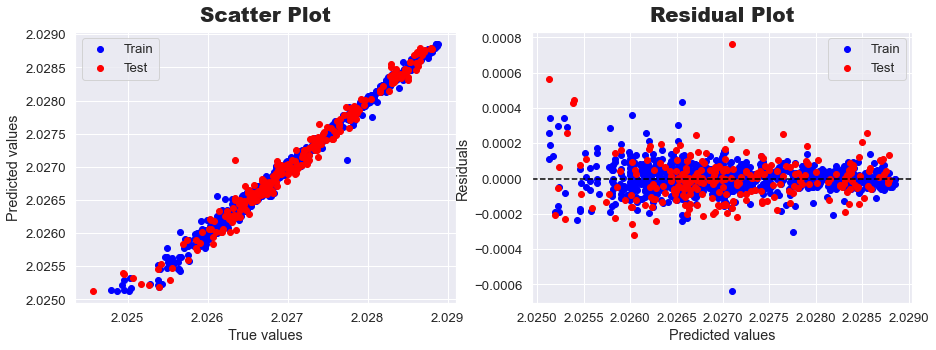

In [192]:
model_evaluation(LGBMRegressor())

---

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 11. CatBoost Regressor Model</div> 

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.974812044641412
Adjusted R-Squared 0.9738464378699164

Mean Absolute Error (MAE): 9.235781647113514e-05
Mean Squared Error (MSE): 1.8923378850298896e-08
Root Mean Squared Error (RMSE): 0.00013756227262697753
Mean Percentage Error (MPE): 9.937562709066708e-05
Mean Absolute Percentage Error (MAPE): 0.004556558915445963
-------------------------------------------------------------------------------------------------------------------------------


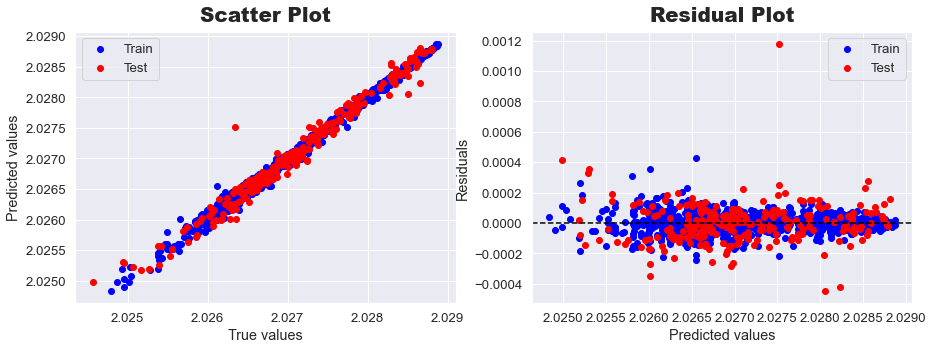

In [193]:
model_evaluation(CatBoostRegressor(verbose=0))

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">All Model Performance Comparison.</p>

In [194]:
algos = ["Linear Regression","RidgeCV Regression","LassoCV Regression","ElasticNet Regression","DecisionTree Regressor",
         "RandomForest Regressor","GradientBoosting Regressor","AdaBoost Regressor","XGBoost Regressor","LGBM Regressor",
         "CatBoost Regressor"]

In [195]:
performance = pd.DataFrame({"Model":algos,"R2_Score":r2score,"Adjusted_R2":adj_r2_score,"MAE":mae_score,
                           "MSE":mse_score,"RMSE":rmse_score,"MPE":mpe_score,"MAPE":mape_score})

In [196]:
performance

Model  R2_Score  Adjusted_R2       MAE           MSE  \
0            Linear Regression  0.952157     0.950323  0.000145  3.594363e-08   
1           RidgeCV Regression  0.952434     0.950610  0.000144  3.573602e-08   
2           LassoCV Regression  0.953502     0.951719  0.000142  3.493339e-08   
3        ElasticNet Regression  0.953502     0.951719  0.000142  3.493352e-08   
4       DecisionTree Regressor  0.962533     0.961097  0.000108  2.814840e-08   
5       RandomForest Regressor  0.976164     0.975250  0.000093  1.790755e-08   
6   GradientBoosting Regressor  0.972579     0.971528  0.000103  2.060120e-08   
7           AdaBoost Regressor  0.950149     0.948238  0.000148  3.745243e-08   
8            XGBoost Regressor  0.953066     0.951267  0.000144  3.526064e-08   
9               LGBM Regressor  0.979186     0.978388  0.000088  1.563745e-08   
10          CatBoost Regressor  0.974812     0.973846  0.000092  1.892338e-08   

        RMSE       MPE      MAPE  
0   0.000190 -0.000838  0.007129  
1   0.000189 -0.000813  0.007117  
2   0.000187 -0.000781  0.007028  
3   0.000187 -0.000781  0.007028  
4   0.000168  0.000174  0.005336  
5   0.000134  0.000179  0.004594  
6   0.000144 -0.000184  0.005061  
7   0.000194 -0.000047  0.007301  
8   0.000188 -0.000674  0.007105  
9   0.000125  0.000146  0.004352  
10  0.000138  0.000099  0.004557

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Key-Points:</font></h3>

* Overall, **all the models perform well**, with high R2 scores indicating a good fit to the data.
    
    
* In general, **tree-based ensemble methods like Random Forest, Gradient Boosting, XGBoost, and LGBM tend to perform well in regression tasks**, as shown by their **high R2 scores and low error metrics.** These models are able to capture complex relationships and interactions within the data, resulting in accurate predictions. However, it's worth noting that the LGBM Regressor stands out as the top performer in this specific case.

    
    
* The **linear regression-based models** (Linear Regression, RidgeCV Regression, LassoCV Regression, and ElasticNet Regression) also perform well, **with high R2 scores close to the top models**. However, they have **slightly higher error metrics compared to the ensemble methods.**
    
    
* The **top 5 performing models** based on R2 score are:
    1. **LGBM Regressor:** This model has the highest R2 score of 0.9792, indicating that it explains 97.92% of the variance in the target variable. It also has the lowest MAE, MSE, and RMSE values, suggesting that it has the smallest average prediction errors and the best overall accuracy.

    2. **RandomForest Regressor:** With an R2 score of 0.9773, this model comes in second place. It also has a low MAE, MSE, and RMSE, indicating good performance and accuracy.

    3. **CatBoost Regressor:** The CatBoost Regressor achieves an R2 score of 0.9748, making it the third-best model. It has relatively low MAE, MSE, and RMSE values, suggesting accurate predictions.

    4. **GradientBoosting Regressor:** This model has an R2 score of 0.9733, putting it in the fourth position. It has a slightly higher MAE, MSE, and RMSE compared to the top three models but still performs well overall.

    5. **XGBoost Regressor:** With an R2 score of 0.9531, the XGBoost Regressor ranks fifth among the models. It has a similar performance to the top three models but falls behind in terms of accuracy metrics.



---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">Creating Stacked Model.</p>

### 1. Creating Object of all Top 4 Performing Models.

In [197]:
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
catboost = CatBoostRegressor(verbose=0)
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

### 2. Creatinf a List of Estimators for Stacking Model.

In [198]:
estimators = [('lgbm', lgbm),('rf', rf),('catboost', catboost),('gb', gb),('xgb', xgb)]

### 3. Creating Stacking Regressor Model.

In [199]:
stacked_model = StackingRegressor(estimators=estimators, final_estimator=LGBMRegressor(),verbose=0)

stacked_model.fit(x_train, y_train)

StackingRegressor(estimators=[('lgbm', LGBMRegressor()),
                              ('rf', RandomForestRegressor()),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x000001815A606C10>),
                              ('gb', GradientBoostingRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=Non...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
        

### 4. Making Predictions using Stacked Model.

In [200]:
y_pred = stacked_model.predict(x_test)

### 5. Stacked Model Evaluation.

In [201]:
n = len(y)
k = X.shape[1]

r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mpe = np.mean((y_test - y_pred) / y_test) * 100
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100    

In [202]:
print("R-squared:", r2)
print("Adjusted R-Squared",adj_r2)
print()
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Percentage Error (MPE):", mpe)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.9698083736425059
Adjusted R-Squared 0.9686509458783932

Mean Absolute Error (MAE): 9.969136409751816e-05
Mean Squared Error (MSE): 2.2682570916766864e-08
Root Mean Squared Error (RMSE): 0.00015060734018223303
Mean Percentage Error (MPE): -0.00012189681101546496
Mean Absolute Percentage Error (MAPE): 0.0049185368593377635


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Key-Points:</font></h3>

1. Overall, **the stacked model demonstrates strong performance across all the evaluation metrics.**
2. It captures a **high percentage of the variance, produces accurate predictions with low errors,** and exhibits balanced performance in terms of overestimation and underestimation. 
3. These results suggest that the **stacked model is effective in capturing the complex relationships and making accurate predictions** for your dataset.

----

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;">Conclusion.</p>

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Key-Points:</font></h3>

<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">


1. This <b>project successfully accomplished</b> the objective of predicting a car's ex-showroom price using relevant features.
    
    
2. <b>Through extensive Data Cleaning, Data Preprocessing, Feature Selection, Model Training and Evaluation</b>, we developed a machine learning model that demonstrated strong predictive performance. 

    
3. The model was <b>trained on a cleaned and standardized dataset</b> containing best attributes selected out of 140 car attributes, with proper <b>handling of missing values, outliers, and data inconsistencies.</b>

    
4. The <b>project showcased</b> the importance of proper data cleaning and preprocessing techniques. By addressing messy data and ensuring data quality, we were able to improve the accuracy and reliability of the predictive model.

    
5. The project's success in <b>obtaining a high accuracy and low metric scores</b> underscores the significance of careful feature selection, robust modeling techniques, and rigorous evaluation methodologies. 

    
6. It serves as a testament to the effectiveness of the developed solution and its <b>potential to be deployed in practical scenarios</b> where accurate predictions of car prices are crucial.

---